# Exploratory Data Analysis (EDA) - Shopee Product Analysis
## Focus: Analyzing Products Only After Their Listing Dates

This notebook performs comprehensive EDA on Shopee product data, **excluding pre-listing periods** to avoid data skewing from NaN values that represent periods when products weren't yet available.

## Step 1: Import Libraries and Load Data

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


In [17]:
# Load the dataset
df = pd.read_csv('consolidated_file_cleaned.csv')

print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\n" + "="*80)
print("FIRST 5 ROWS")
print("="*80)
df.head()

DATASET LOADED SUCCESSFULLY

Dataset shape: 7,554,662 rows × 32 columns

Column names:
  1. product
  2. time
  3. avg.sku_price(₱)
  4. sold/day
  5. revenue/day(₱)
  6. sold/m
  7. product_sales_rate(%)
  8. price(₱)
  9. sku
  10. sold
  11. sold/month(₱)
  12. revenue/month
  13. new_ratings
  14. ratings
  15. ratings_rate
  16. likes
  17. rating_star
  18. new_likes
  19. id
  20. top-level_category
  21. second-level_category
  22. third-level_category
  23. fourth-level_category
  24. fifth-level_category
  25. brand
  26. brand_id
  27. shop
  28. shop_id
  29. seller_from
  30. link
  31. listing_time
  32. joined

FIRST 5 ROWS


,product,time,avg.sku_price(₱),sold/day,revenue/day(₱),sold/m,product_sales_rate(%),price(₱),sku,sold,...,fourth-level_category,fifth-level_category,brand,brand_id,shop,shop_id,seller_from,link,listing_time,joined
0,Cute Different Designs button accessories ...,2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,JibbitzCharms,456275066,Overseas,https://shopee.ph/product/456275066/17287885303,2022-10-18,NaN
1,Cute Different Designs button accessories ...,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,JibbitzCharms,456275066,Overseas,https://shopee.ph/product/456275066/17287885303,2022-10-18,NaN
2,Cute Different Designs button accessories ...,2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,JibbitzCharms,456275066,Overseas,https://shopee.ph/product/456275066/17287885303,2022-10-18,NaN
3,Cute Different Designs button accessories ...,2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,JibbitzCharms,456275066,Overseas,https://shopee.ph/product/456275066/17287885303,2022-10-18,NaN
4,Cute Different Designs button accessories ...,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,JibbitzCharms,456275066,Overseas,https://shopee.ph/product/456275066/17287885303,2022-10-18,NaN


## Step 2: Standardize Column Names and Data Overview

In [18]:
# Standardize column names (lowercase, replace spaces/special chars with underscore)
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace('[^a-z0-9_]', '', regex=True))

print("="*80)
print("STANDARDIZED COLUMN NAMES")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

# Data types and missing values
print("\n" + "="*80)
print("DATA TYPES AND MISSING VALUES")
print("="*80)
print("\nData Types:")
print(df.dtypes)

print("\n" + "="*80)
print("MISSING VALUES SUMMARY")
print("="*80)
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_summary.to_string(index=False))

STANDARDIZED COLUMN NAMES
  1. product
  2. time
  3. avgsku_price
  4. soldday
  5. revenueday
  6. soldm
  7. product_sales_rate
  8. price
  9. sku
  10. sold
  11. soldmonth
  12. revenuemonth
  13. new_ratings
  14. ratings
  15. ratings_rate
  16. likes
  17. rating_star
  18. new_likes
  19. id
  20. toplevel_category
  21. secondlevel_category
  22. thirdlevel_category
  23. fourthlevel_category
  24. fifthlevel_category
  25. brand
  26. brand_id
  27. shop
  28. shop_id
  29. seller_from
  30. link
  31. listing_time
  32. joined

DATA TYPES AND MISSING VALUES

Data Types:
product                  object
time                     object
avgsku_price            float64
soldday                 float64
revenueday              float64
soldm                   float64
product_sales_rate      float64
price                   float64
sku                     float64
sold                    float64
soldmonth               float64
revenuemonth            float64
new_ratings             fl

## Step 3: Identify and Analyze Listing Dates Distribution

**Goal**: Understand when products were first listed to properly filter out pre-listing NaN values.

In [19]:
# Step 3.1: Identify date columns and product identifier
print("="*80)
print("IDENTIFYING DATE COLUMNS AND PRODUCT IDENTIFIERS")
print("="*80)

# Find date columns
date_cols = [col for col in df.columns if any(x in col.lower() for x in ['date', 'time', 'month', 'year'])]
print(f"\nDate-related columns found: {date_cols}")

# Find product identifier columns
product_id_cols = [col for col in df.columns if any(x in col.lower() for x in ['product', 'item', 'sku', 'id', 'name'])]
print(f"Product identifier columns found: {product_id_cols}")

# Find sales/price columns to determine listing date
sales_cols = [col for col in df.columns if any(x in col.lower() for x in ['sales', 'sold', 'quantity'])]
price_cols = [col for col in df.columns if 'price' in col.lower()]

print(f"\nSales-related columns: {sales_cols}")
print(f"Price-related columns: {price_cols}")

# Show sample of the data
print("\n" + "="*80)
print("SAMPLE DATA (First 10 rows)")
print("="*80)
if date_cols and product_id_cols:
    cols_to_show = product_id_cols[:2] + date_cols[:2] + sales_cols[:1] + price_cols[:1]
    cols_to_show = [col for col in cols_to_show if col in df.columns]
    print(df[cols_to_show].head(10))
else:
    print(df.head(10))

IDENTIFYING DATE COLUMNS AND PRODUCT IDENTIFIERS

Date-related columns found: ['time', 'soldmonth', 'revenuemonth', 'listing_time']
Product identifier columns found: ['product', 'avgsku_price', 'product_sales_rate', 'sku', 'id', 'brand_id', 'shop_id']

Sales-related columns: ['soldday', 'soldm', 'product_sales_rate', 'sold', 'soldmonth']
Price-related columns: ['avgsku_price', 'price']

SAMPLE DATA (First 10 rows)
                                             product  avgsku_price  \
0     Cute Different Designs  button accessories ...           NaN   
1     Cute Different Designs  button accessories ...           NaN   
2     Cute Different Designs  button accessories ...           NaN   
3     Cute Different Designs  button accessories ...           NaN   
4     Cute Different Designs  button accessories ...           NaN   
5     Cute Different Designs  button accessories ...           NaN   
6     Cute Different Designs  button accessories ...           NaN   
7     Cute Different D

In [20]:
# Step 3.2: Convert date columns to datetime format
print("="*80)
print("CONVERTING DATE COLUMNS TO DATETIME FORMAT")
print("="*80)

# Convert date columns to datetime
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"✅ Converted '{col}' to datetime")
    except Exception as e:
        print(f"❌ Failed to convert '{col}': {e}")

# Identify the primary date column (likely the transaction/record date)
if date_cols:
    primary_date_col = date_cols[0]
    print(f"\n📅 Using '{primary_date_col}' as primary date column")
    
    # Show date range
    print(f"\nDate range in dataset:")
    print(f"  Earliest: {df[primary_date_col].min()}")
    print(f"  Latest: {df[primary_date_col].max()}")
    print(f"  Total unique dates: {df[primary_date_col].nunique()}")
else:
    print("\n⚠️ No date columns found!")

CONVERTING DATE COLUMNS TO DATETIME FORMAT
✅ Converted 'time' to datetime
✅ Converted 'time' to datetime
✅ Converted 'soldmonth' to datetime
✅ Converted 'revenuemonth' to datetime
✅ Converted 'soldmonth' to datetime
✅ Converted 'revenuemonth' to datetime
✅ Converted 'listing_time' to datetime

📅 Using 'time' as primary date column

Date range in dataset:
  Earliest: 2022-03-01 00:00:00
  Latest: 2025-11-01 00:00:00
  Total unique dates: 45
✅ Converted 'listing_time' to datetime

📅 Using 'time' as primary date column

Date range in dataset:
  Earliest: 2022-03-01 00:00:00
  Latest: 2025-11-01 00:00:00
  Total unique dates: 45


In [21]:
# Step 3.3: Determine listing date for each product (first date with sales activity)
print("="*80)
print("DETERMINING PRODUCT LISTING DATES (First Sales Activity)")
print("="*80)

if product_id_cols and date_cols and sales_cols:
    product_col = product_id_cols[0]
    sales_col = sales_cols[0]
    
    # For each product, find the first date where it has non-zero sales
    # This represents when the product was truly "active" on the platform
    df_with_sales = df[df[sales_col].notna() & (df[sales_col] > 0)].copy()
    
    if len(df_with_sales) > 0:
        # Get first date with sales per product
        listing_dates = df_with_sales.groupby(product_col)[primary_date_col].min().reset_index()
        listing_dates.columns = [product_col, 'listing_date']
        
        # Merge back to main dataframe
        df = df.merge(listing_dates, on=product_col, how='left')
        
        print(f"\n✅ Calculated listing dates for {listing_dates.shape[0]:,} products with sales activity")
        print(f"\nListing Date Statistics:")
        print(f"  Earliest listing: {df['listing_date'].min()}")
        print(f"  Latest listing: {df['listing_date'].max()}")
        print(f"  Median listing date: {df['listing_date'].median()}")
        
        # Distribution of listing dates by month
        listing_month_dist = listing_dates.copy()
        listing_month_dist['listing_month'] = listing_month_dist['listing_date'].dt.to_period('M')
        month_counts = listing_month_dist.groupby('listing_month').size()
        print(f"\nProducts with first sales by month:")
        for month, count in month_counts.items():
            print(f"  {month}: {count:,} products")
        
        # Show sample
        print("\n" + "="*80)
        print("SAMPLE: Products with their Listing Dates")
        print("="*80)
        sample_cols = [product_col, 'listing_date', primary_date_col, sales_col]
        sample_cols = [col for col in sample_cols if col in df.columns]
        print(df[sample_cols].sort_values('listing_date').head(20))
    else:
        print("⚠️ No products with sales activity found")
else:
    print("⚠️ Missing required columns for listing date analysis")

DETERMINING PRODUCT LISTING DATES (First Sales Activity)

✅ Calculated listing dates for 125,947 products with sales activity

Listing Date Statistics:
  Earliest listing: 2022-05-01 00:00:00
  Latest listing: 2025-11-01 00:00:00
  Median listing date: 2023-09-01 00:00:00

Products with first sales by month:
  2022-05: 13,785 products
  2022-06: 3,512 products
  2022-07: 2,879 products
  2022-08: 2,985 products
  2022-09: 4,378 products
  2022-10: 5,541 products
  2022-11: 8,845 products
  2022-12: 3,209 products
  2023-01: 2,059 products
  2023-02: 2,077 products
  2023-03: 2,460 products
  2023-04: 2,372 products
  2023-05: 1,762 products
  2023-06: 1,618 products
  2023-07: 1,649 products
  2023-08: 1,876 products
  2023-09: 2,008 products
  2023-10: 1,453 products
  2023-11: 2,165 products
  2023-12: 2,294 products
  2024-01: 2,213 products
  2024-02: 1,981 products
  2024-03: 1,578 products
  2024-04: 1,997 products
  2024-05: 4,151 products
  2024-06: 2,441 products
  2024-07: 2,

LISTING DATE DISTRIBUTION ANALYSIS

Products Listed per Month:
  Month  New_Products
2022-05         13785
2022-06          3512
2022-07          2879
2022-08          2985
2022-09          4378
2022-10          5541
2022-11          8845
2022-12          3209
2023-01          2059
2023-02          2077
2023-03          2460
2023-04          2372
2023-05          1762
2023-06          1618
2023-07          1649
2023-08          1876
2023-09          2008
2023-10          1453
2023-11          2165
2023-12          2294
2024-01          2213
2024-02          1981
2024-03          1578
2024-04          1997
2024-05          4151
2024-06          2441
2024-07          2373
2024-08          1774
2024-09          2721
2024-10          2043
2024-11          1634
2024-12          2214
2025-01          2571
2025-02          2128
2025-03          2103
2025-04          2526
2025-05          2044
2025-06          2834
2025-07          2152
2025-08          1833
2025-09          5096
2025-10      

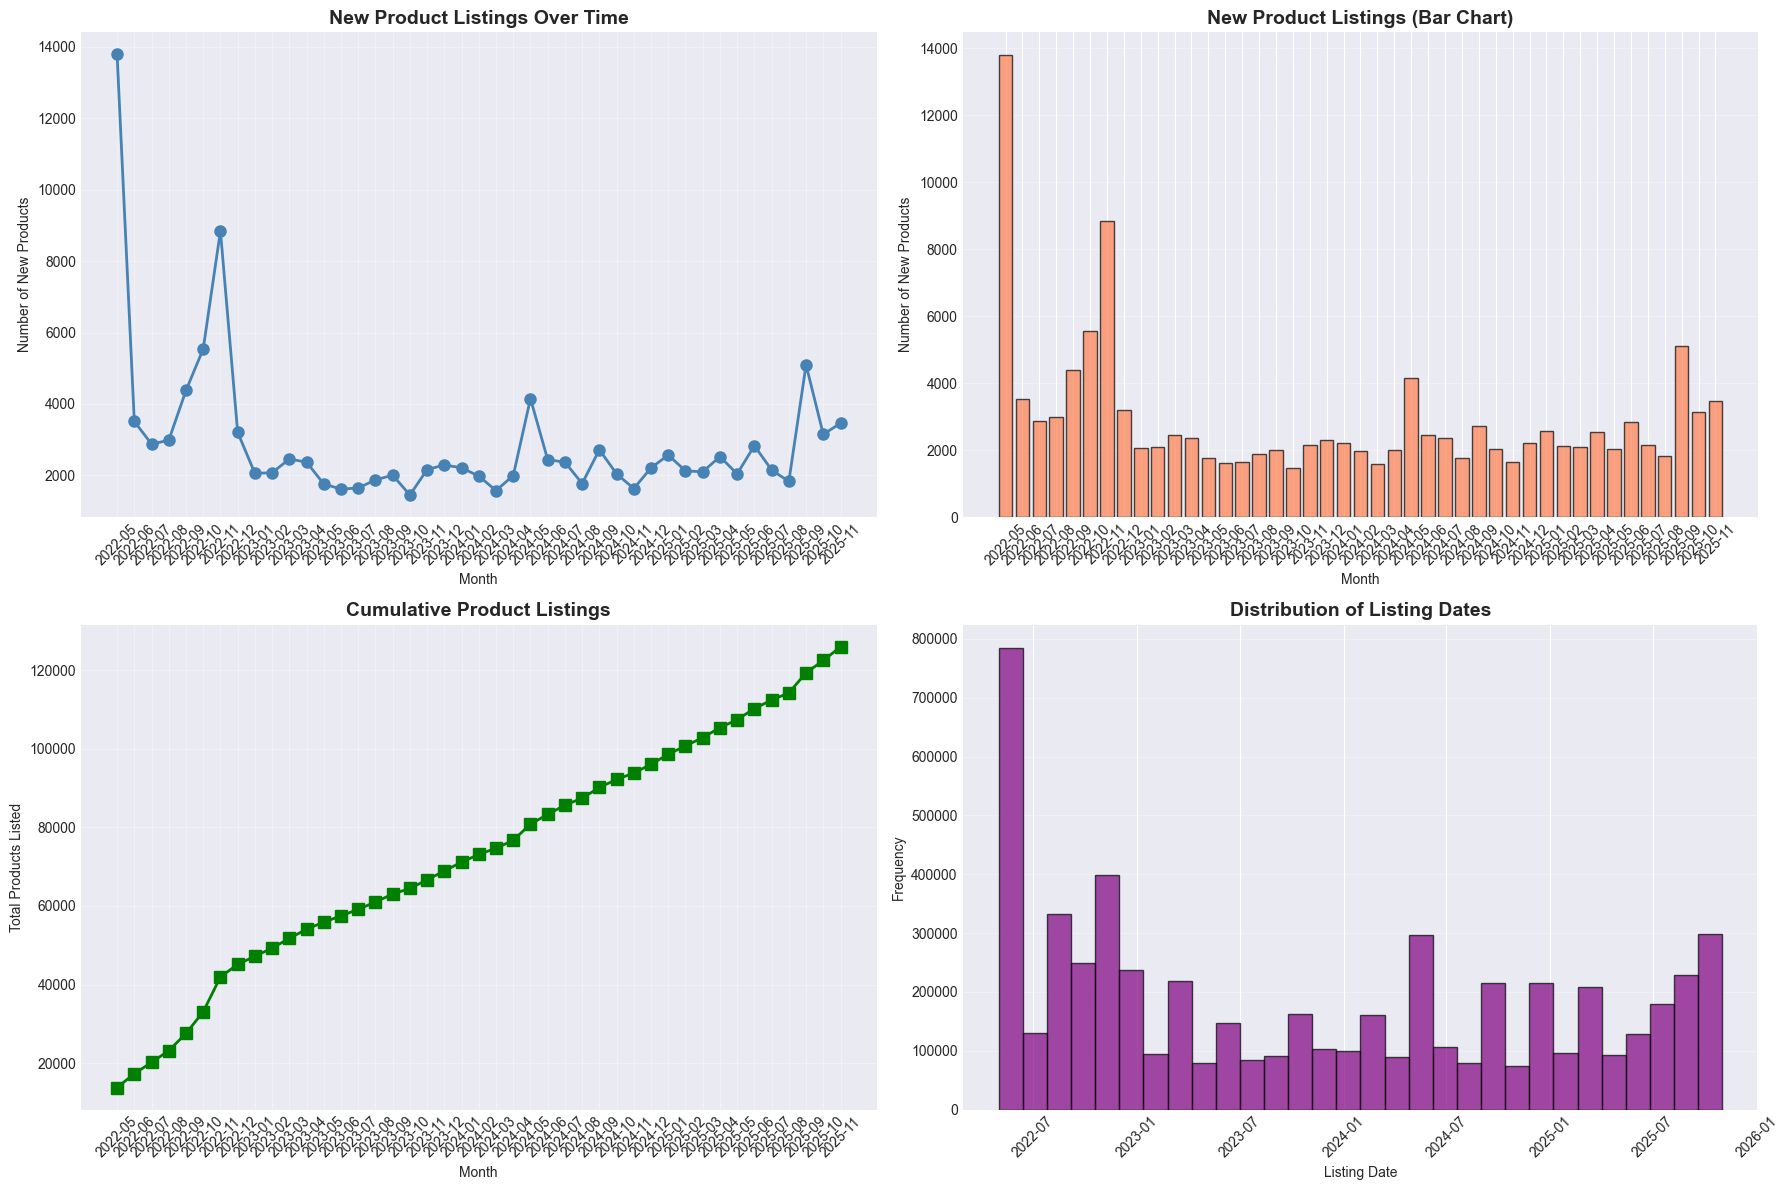


LISTING DATE SUMMARY STATISTICS
Total unique products: 167,589
Products with identified listing dates: 5,680,481
Average new listings per month: 2929.0
Peak listing month: 2022-05 (13785 products)
Total unique products: 167,589
Products with identified listing dates: 5,680,481
Average new listings per month: 2929.0
Peak listing month: 2022-05 (13785 products)


In [22]:
# Step 3.4: Visualize Listing Date Distribution
print("="*80)
print("LISTING DATE DISTRIBUTION ANALYSIS")
print("="*80)

if 'listing_date' in df.columns:
    # Get unique products with their listing dates (one row per product)
    unique_products = df[[product_col, 'listing_date']].drop_duplicates(subset=[product_col])
    
    # Create summary by month
    unique_products['listing_year_month'] = unique_products['listing_date'].dt.to_period('M')
    listing_summary = unique_products.groupby('listing_year_month').size().reset_index()
    listing_summary.columns = ['Month', 'New_Products']
    listing_summary['Month'] = listing_summary['Month'].astype(str)
    
    print(f"\nProducts Listed per Month:")
    print(listing_summary.to_string(index=False))
    
    # Visualization 1: Line plot of new listings over time
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Plot 1: New listings per month (line plot)
    axes[0, 0].plot(listing_summary['Month'], listing_summary['New_Products'], 
                    marker='o', linewidth=2, markersize=8, color='steelblue')
    axes[0, 0].set_title('New Product Listings Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Number of New Products')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Bar chart
    axes[0, 1].bar(listing_summary['Month'], listing_summary['New_Products'], 
                   color='coral', alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('New Product Listings (Bar Chart)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Number of New Products')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Cumulative listings
    listing_summary['Cumulative_Products'] = listing_summary['New_Products'].cumsum()
    axes[1, 0].plot(listing_summary['Month'], listing_summary['Cumulative_Products'], 
                    marker='s', linewidth=2, markersize=8, color='green')
    axes[1, 0].set_title('Cumulative Product Listings', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Total Products Listed')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Distribution of listing dates (histogram)
    axes[1, 1].hist(df['listing_date'].dropna(), bins=30, color='purple', alpha=0.7, edgecolor='black')
    axes[1, 1].set_title('Distribution of Listing Dates', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Listing Date')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n" + "="*80)
    print("LISTING DATE SUMMARY STATISTICS")
    print("="*80)
    print(f"Total unique products: {df[product_col].nunique():,}")
    print(f"Products with identified listing dates: {df['listing_date'].notna().sum():,}")
    print(f"Average new listings per month: {listing_summary['New_Products'].mean():.1f}")
    print(f"Peak listing month: {listing_summary.loc[listing_summary['New_Products'].idxmax(), 'Month']} "
          f"({listing_summary['New_Products'].max()} products)")
    
else:
    print("⚠️ Listing dates not calculated")

## Step 4: Filter Dataset - Remove Pre-Listing Periods

Now we'll filter the dataset to **only include records where date >= listing_date** to avoid NaN value skewing.

In [23]:
# Filter out pre-listing periods
print("="*80)
print("FILTERING OUT PRE-LISTING PERIODS")
print("="*80)

print(f"\nOriginal dataset size: {len(df):,} rows")

if 'listing_date' in df.columns and primary_date_col:
    # Create filtered dataset - only keep records after listing date
    df_filtered = df[df[primary_date_col] >= df['listing_date']].copy()
    
    print(f"Filtered dataset size: {len(df_filtered):,} rows")
    print(f"Rows removed (pre-listing): {len(df) - len(df_filtered):,} ({(len(df) - len(df_filtered))/len(df)*100:.2f}%)")
    
    # Compare missing values before and after
    print("\n" + "="*80)
    print("MISSING VALUES COMPARISON")
    print("="*80)
    
    print("\nBEFORE filtering (with pre-listing periods):")
    missing_before = df.isnull().sum().sum()
    print(f"Total missing values: {missing_before:,}")
    
    print("\nAFTER filtering (only post-listing periods):")
    missing_after = df_filtered.isnull().sum().sum()
    print(f"Total missing values: {missing_after:,}")
    print(f"Missing values reduced by: {missing_before - missing_after:,} ({(missing_before - missing_after)/missing_before*100:.2f}%)")
    
    # Update main dataframe
    df = df_filtered.copy()
    
    print("\n✅ Dataset successfully filtered to include only post-listing data")
    print("   All subsequent analysis will use this filtered dataset")
    
else:
    print("⚠️ Cannot filter - missing required columns")

FILTERING OUT PRE-LISTING PERIODS

Original dataset size: 7,554,662 rows
Filtered dataset size: 3,157,863 rows
Rows removed (pre-listing): 4,396,799 (58.20%)

MISSING VALUES COMPARISON

BEFORE filtering (with pre-listing periods):
Filtered dataset size: 3,157,863 rows
Rows removed (pre-listing): 4,396,799 (58.20%)

MISSING VALUES COMPARISON

BEFORE filtering (with pre-listing periods):
Total missing values: 73,977,181

AFTER filtering (only post-listing periods):
Total missing values: 73,977,181

AFTER filtering (only post-listing periods):
Total missing values: 16,855,724
Missing values reduced by: 57,121,457 (77.21%)
Total missing values: 16,855,724
Missing values reduced by: 57,121,457 (77.21%)

✅ Dataset successfully filtered to include only post-listing data
   All subsequent analysis will use this filtered dataset

✅ Dataset successfully filtered to include only post-listing data
   All subsequent analysis will use this filtered dataset


## Step 5: Comprehensive EDA on Filtered Dataset

Now performing full exploratory data analysis on the **cleaned, filtered dataset** (no pre-listing periods).

### 5.1 Univariate Analysis - Distribution of Key Variables

In [24]:
# Identify key numeric variables for analysis
print("="*80)
print("IDENTIFYING KEY VARIABLES FOR EDA")
print("="*80)

# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  • {col}")

# Identify key variables (price, sales, ratings, etc.)
key_vars = []
for pattern in ['price', 'sales', 'sold', 'rating', 'revenue', 'stock', 'quantity']:
    matching = [col for col in numeric_cols if pattern in col.lower()]
    key_vars.extend(matching)

# Remove duplicates
key_vars = list(dict.fromkeys(key_vars))

print(f"\n📊 Key variables identified for detailed analysis:")
for col in key_vars:
    print(f"  • {col}")

# Summary statistics for key variables
if key_vars:
    print("\n" + "="*80)
    print("SUMMARY STATISTICS (Post-Listing Data Only)")
    print("="*80)
    print(df[key_vars].describe().round(2))

IDENTIFYING KEY VARIABLES FOR EDA

Numeric columns (16):
  • avgsku_price
  • soldday
  • revenueday
  • soldm
  • product_sales_rate
  • price
  • sku
  • sold
  • new_ratings
  • ratings
  • ratings_rate
  • likes
  • rating_star
  • new_likes
  • id
  • shop_id

📊 Key variables identified for detailed analysis:
  • avgsku_price
  • price
  • product_sales_rate
  • soldday
  • soldm
  • sold
  • new_ratings
  • ratings
  • ratings_rate
  • rating_star
  • revenueday

SUMMARY STATISTICS (Post-Listing Data Only)
       avgsku_price       price  product_sales_rate     soldday         soldm  \
count    3157863.00  3157863.00           545704.00  3157863.00  3.157863e+06   
mean         165.89      158.26             3301.99      103.70  1.882470e+03   
std          686.21      672.78            91625.25     5997.54  1.010654e+06   
min            1.00        1.19        -16105572.96  -118433.00  0.000000e+00   
25%           22.00       20.00              -13.50        0.00  0.000000e+00

DISTRIBUTION ANALYSIS

Analyzing: AVGSKU_PRICE
Count: 3,157,863
Mean: 165.89
Median: 58.00
Std Dev: 686.21
Min: 1.00
Max: 99999.00
Skewness: 51.32


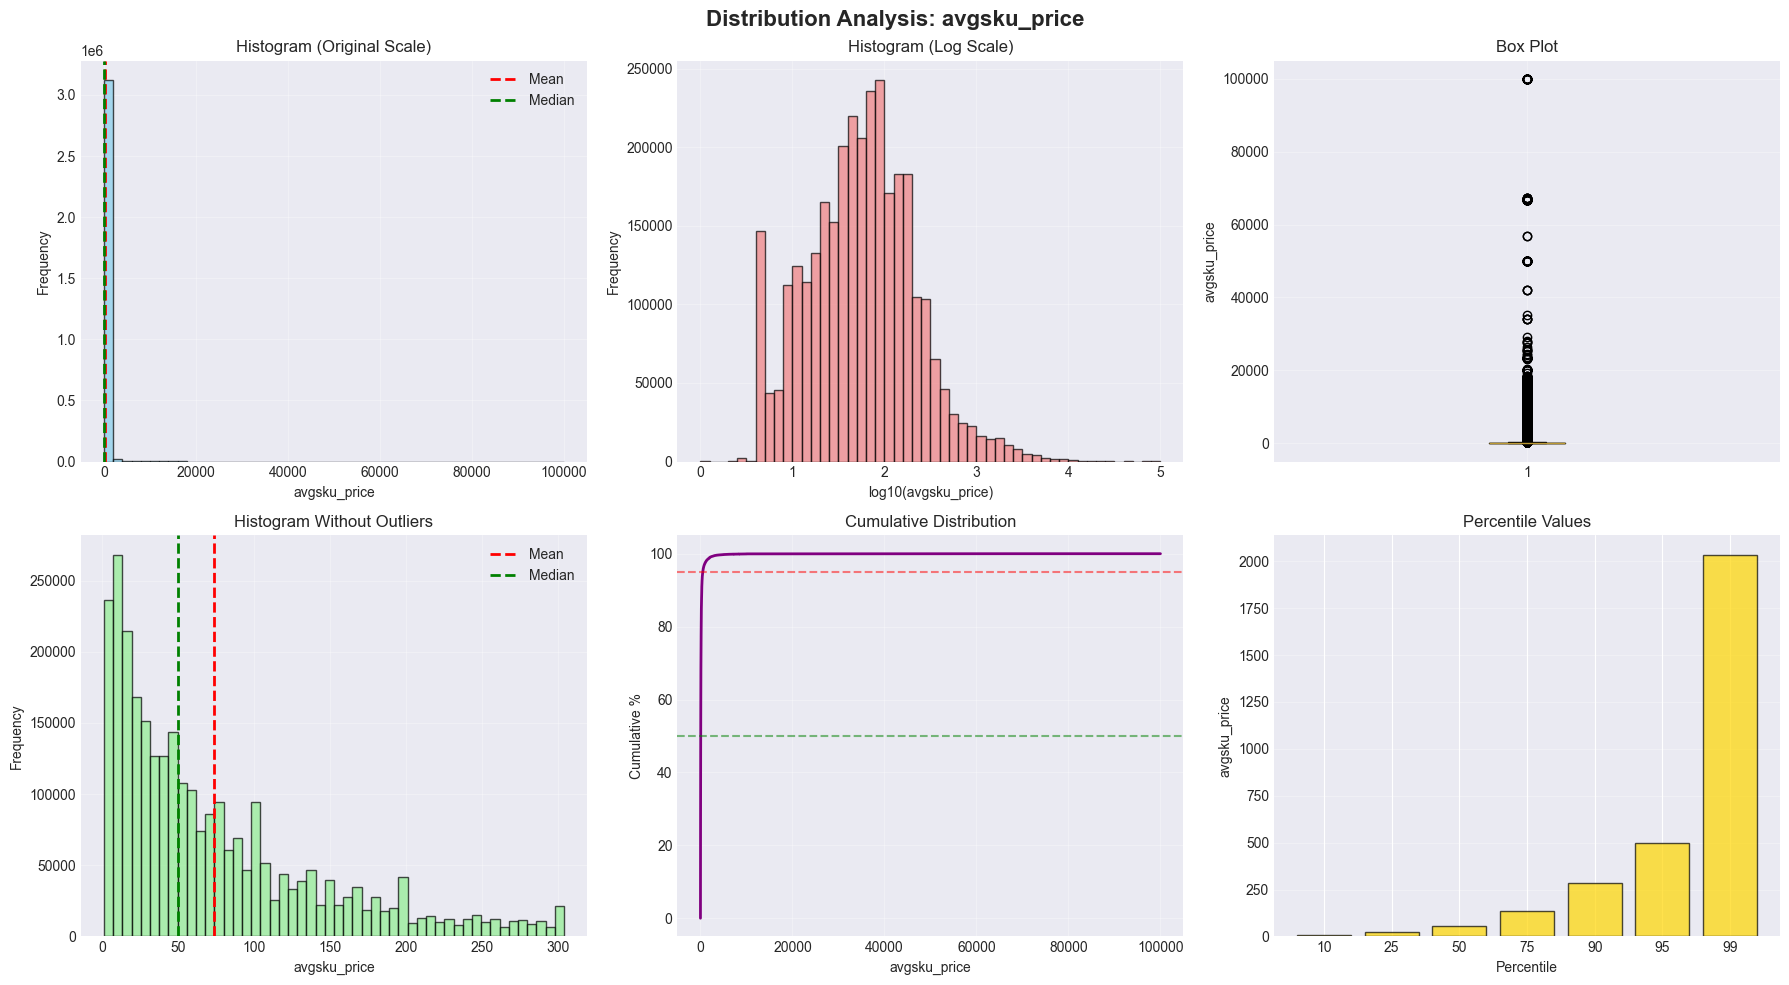


💡 Distribution insights: Skewness = 51.32 (Right-skewed)

Analyzing: PRICE
Count: 3,157,863
Mean: 158.26
Median: 55.00
Std Dev: 672.78
Min: 1.19
Max: 99999.00
Skewness: 53.82


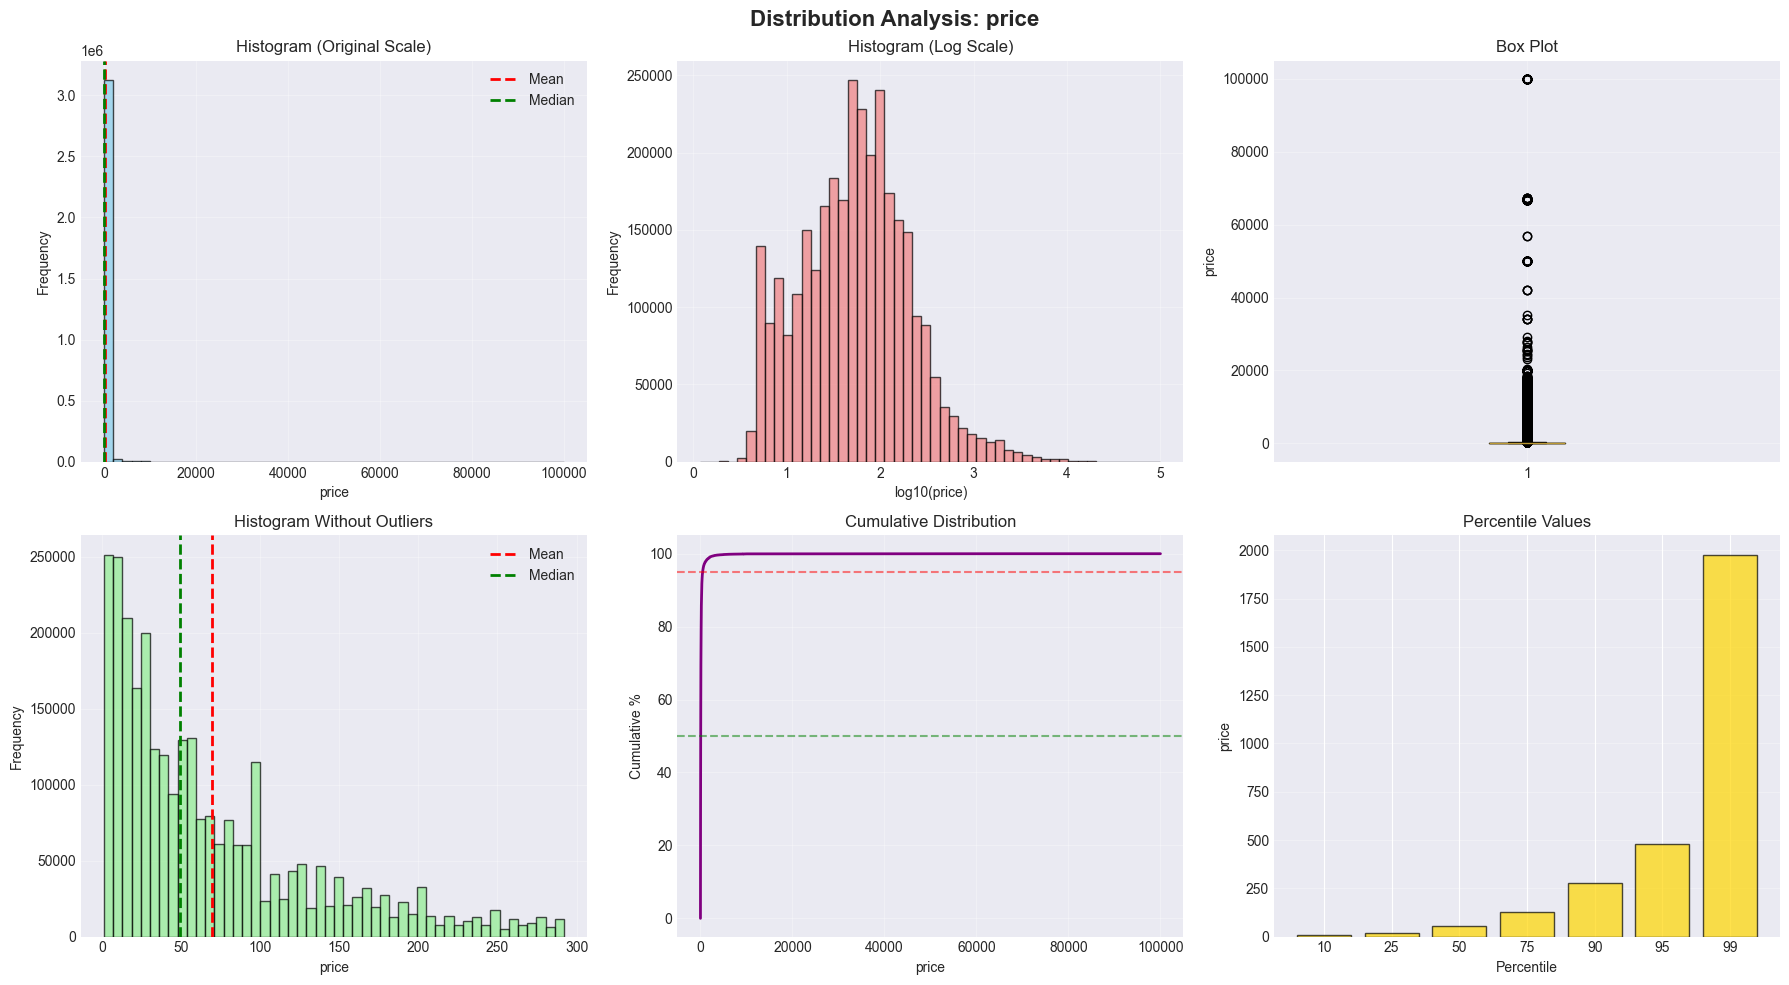


💡 Distribution insights: Skewness = 53.82 (Right-skewed)

Analyzing: PRODUCT_SALES_RATE
Count: 545,704
Mean: 3301.99
Median: 15.32
Std Dev: 91625.25
Min: -16105572.96
Max: 18758054.08
Skewness: 74.46


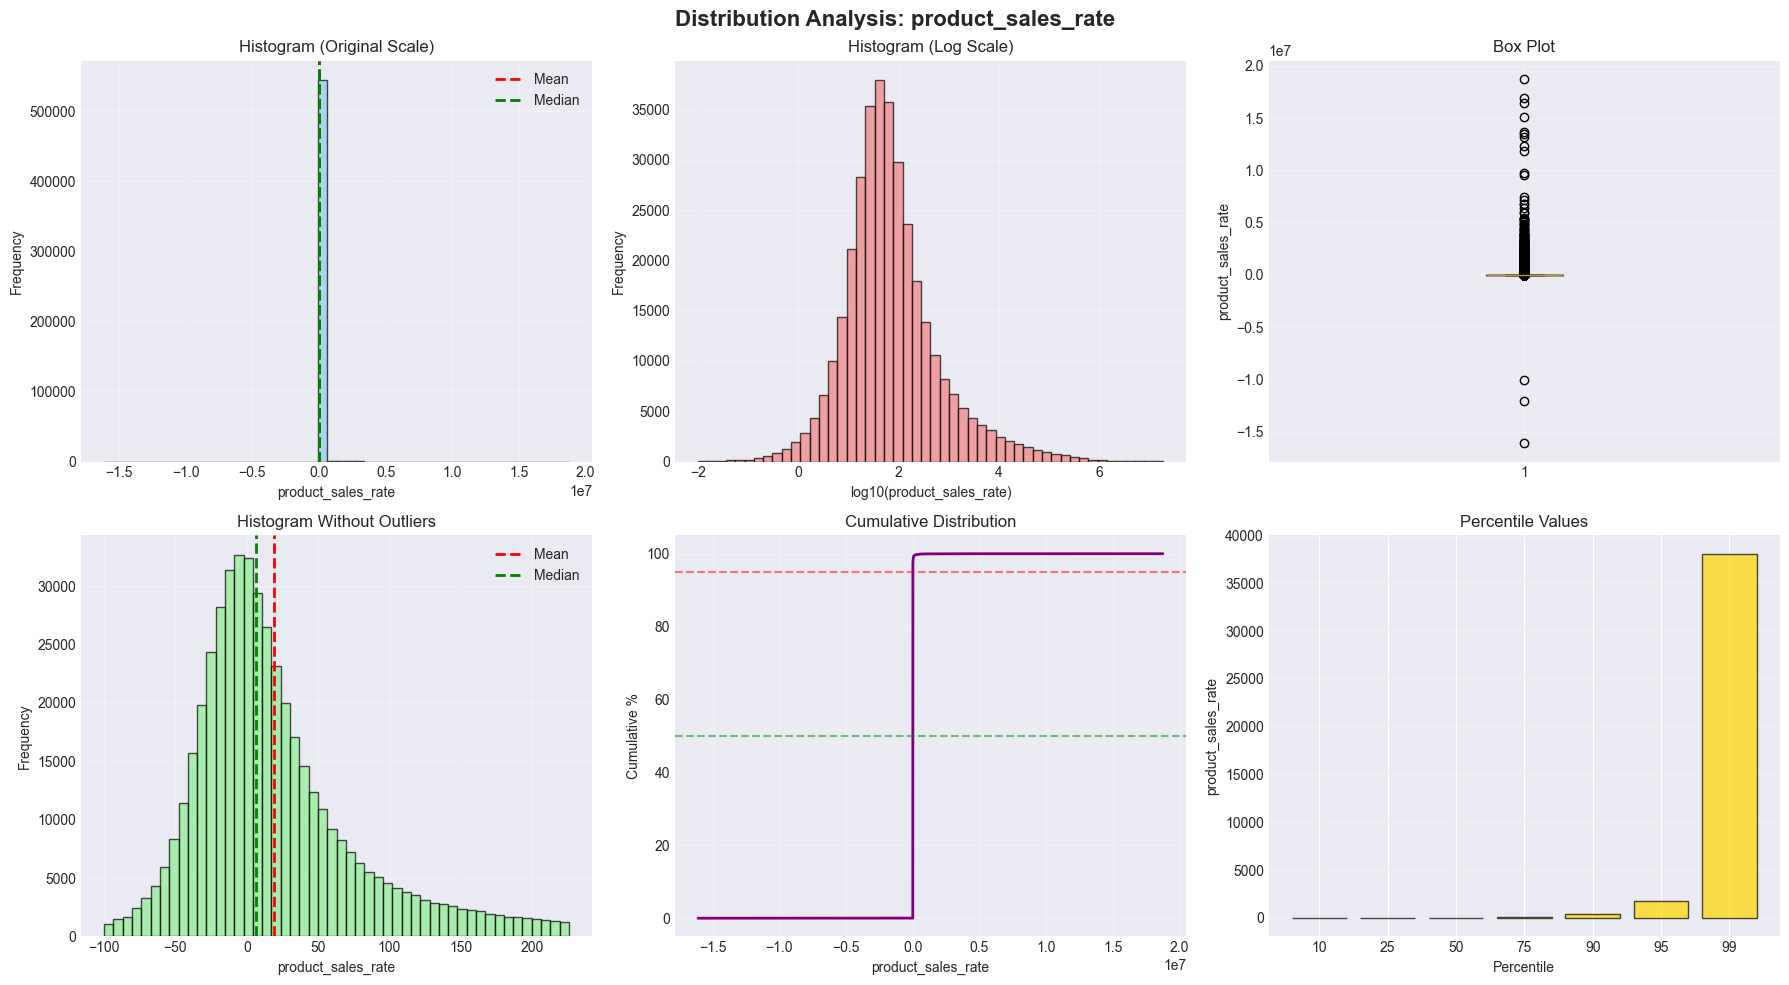


💡 Distribution insights: Skewness = 74.46 (Right-skewed)


In [25]:
# Distribution plots for key variables (with log-scale for skewed data)
print("="*80)
print("DISTRIBUTION ANALYSIS")
print("="*80)

for col in key_vars[:3]:  # Analyze first 3 key variables (can adjust)
    print(f"\n{'='*80}")
    print(f"Analyzing: {col.upper()}")
    print(f"{'='*80}")
    
    data = df[col].dropna()
    
    # Statistics
    print(f"Count: {len(data):,}")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Std Dev: {data.std():.2f}")
    print(f"Min: {data.min():.2f}")
    print(f"Max: {data.max():.2f}")
    print(f"Skewness: {data.skew():.2f}")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Distribution Analysis: {col}', fontsize=16, fontweight='bold')
    
    # 1. Histogram (original scale)
    axes[0, 0].hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0, 0].axvline(data.median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[0, 0].set_title('Histogram (Original Scale)')
    axes[0, 0].set_xlabel(col)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Log-scale histogram
    non_zero = data[data > 0]
    if len(non_zero) > 0:
        axes[0, 1].hist(np.log10(non_zero), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Histogram (Log Scale)')
        axes[0, 1].set_xlabel(f'log10({col})')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Box plot
    axes[0, 2].boxplot(data, vert=True)
    axes[0, 2].set_title('Box Plot')
    axes[0, 2].set_ylabel(col)
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Without outliers (IQR method)
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data_no_outliers = data[(data >= lower) & (data <= upper)]
    
    axes[1, 0].hist(data_no_outliers, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(data_no_outliers.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[1, 0].axvline(data_no_outliers.median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[1, 0].set_title('Histogram Without Outliers')
    axes[1, 0].set_xlabel(col)
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 5. Cumulative distribution
    sorted_data = np.sort(data)
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100
    axes[1, 1].plot(sorted_data, cumulative, linewidth=2, color='purple')
    axes[1, 1].axhline(50, color='green', linestyle='--', alpha=0.5)
    axes[1, 1].axhline(95, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].set_title('Cumulative Distribution')
    axes[1, 1].set_xlabel(col)
    axes[1, 1].set_ylabel('Cumulative %')
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Percentile comparison
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    percentile_values = [data.quantile(p/100) for p in percentiles]
    axes[1, 2].bar([str(p) for p in percentiles], percentile_values, color='gold', edgecolor='black', alpha=0.7)
    axes[1, 2].set_title('Percentile Values')
    axes[1, 2].set_xlabel('Percentile')
    axes[1, 2].set_ylabel(col)
    axes[1, 2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 Distribution insights: Skewness = {data.skew():.2f} "
          f"({'Right-skewed' if data.skew() > 0 else 'Left-skewed' if data.skew() < 0 else 'Symmetric'})")

### 5.2 Additional Distributions - Rating and Price Analysis

RATING DISTRIBUTION ANALYSIS

Rating Statistics:
  Count: 593,976
  Mean: 798.83
  Median: 362.00
  Std Dev: 6547.10
  Min: -1915557.00
  Max: 1940763.00

Rating Distribution (Value Counts):
  -1915557.0: 1 (0.00%)
  -1567126.0: 1 (0.00%)
  -487195.0: 1 (0.00%)
  -318794.0: 1 (0.00%)
  -259611.0: 1 (0.00%)
  -235035.0: 1 (0.00%)
  -216245.0: 1 (0.00%)
  -209846.0: 1 (0.00%)
  -203323.0: 1 (0.00%)
  -198248.0: 1 (0.00%)
  -175289.0: 1 (0.00%)
  -170454.0: 1 (0.00%)
  -165268.0: 1 (0.00%)
  -153093.0: 1 (0.00%)
  -141859.0: 1 (0.00%)
  -140862.0: 1 (0.00%)
  -139353.0: 1 (0.00%)
  -138034.0: 1 (0.00%)
  -136355.0: 1 (0.00%)
  -126505.0: 1 (0.00%)
  -125852.0: 1 (0.00%)
  -120464.0: 1 (0.00%)
  -114750.0: 1 (0.00%)
  -113222.0: 1 (0.00%)
  -112379.0: 1 (0.00%)
  -111732.0: 1 (0.00%)
  -110559.0: 1 (0.00%)
  -108095.0: 1 (0.00%)
  -107130.0: 1 (0.00%)
  -105487.0: 1 (0.00%)
  -103643.0: 1 (0.00%)
  -102358.0: 1 (0.00%)
  -102283.0: 1 (0.00%)
  -98109.0: 1 (0.00%)
  -96186.0: 1 (0.00%)
  -9

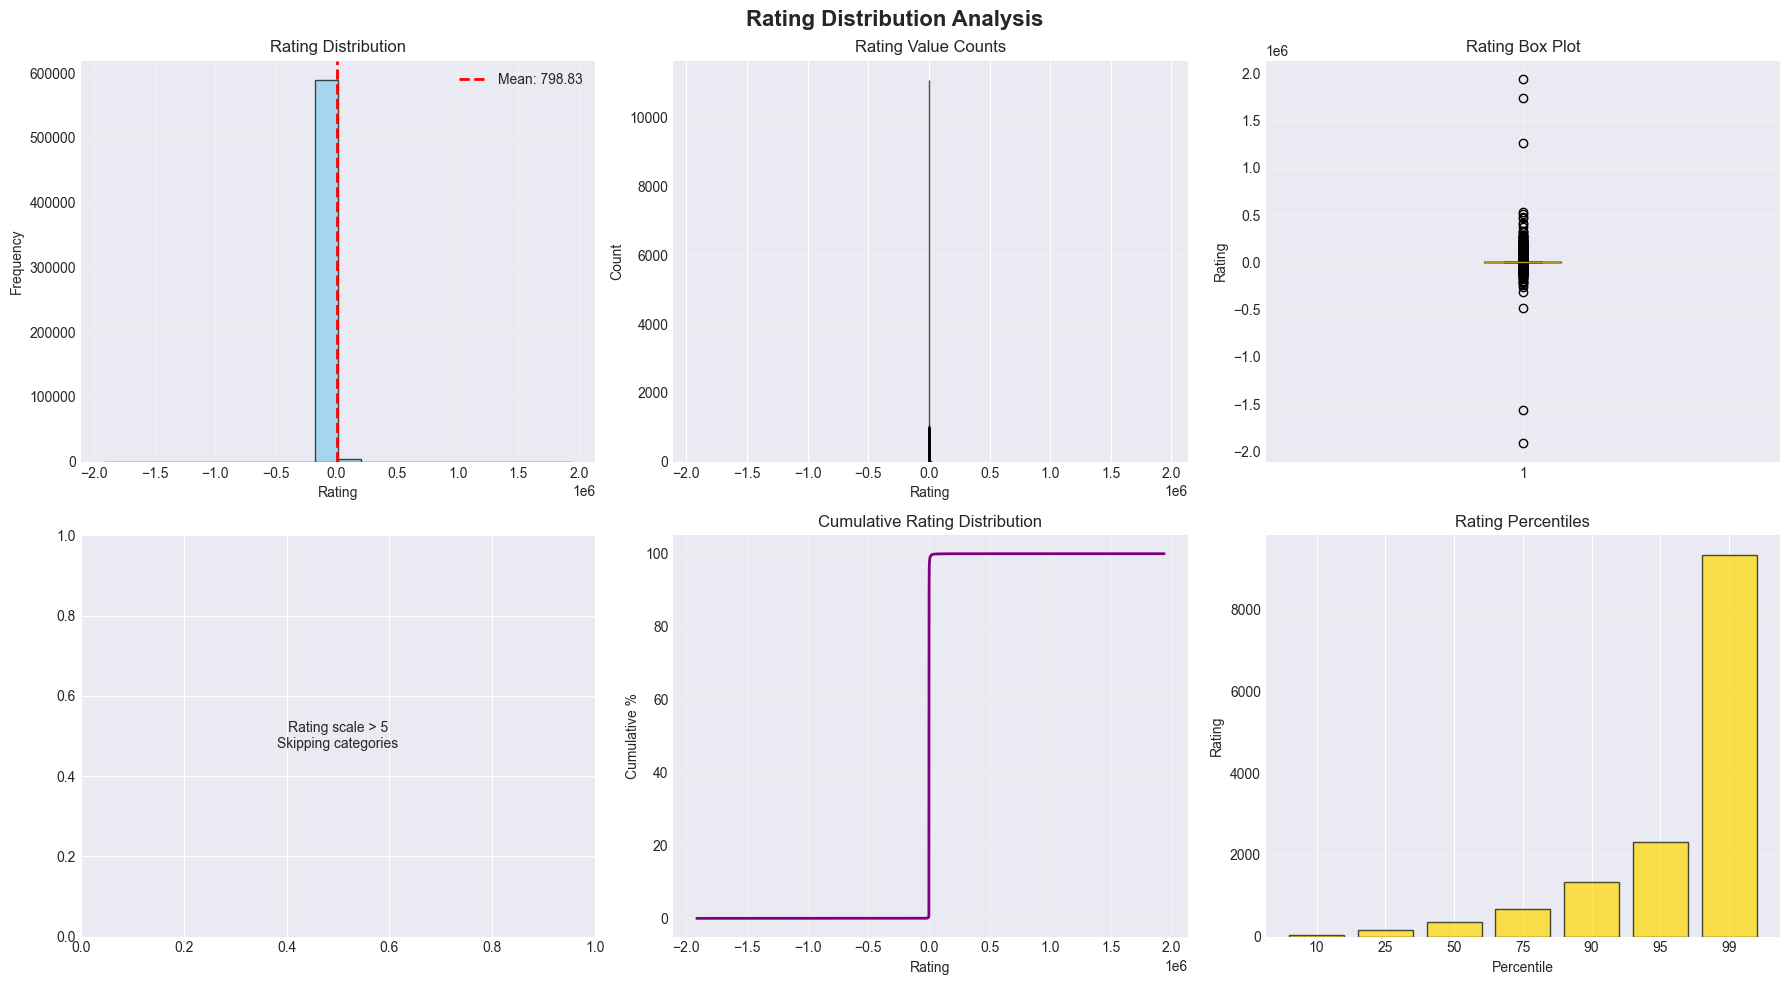

In [26]:
# Analyze Rating Distribution
print("="*80)
print("RATING DISTRIBUTION ANALYSIS")
print("="*80)

if price_cols:
    rating_col = [col for col in df.columns if 'rating' in col.lower()]
    
    if rating_col:
        rating_col = rating_col[0]
        rating_data = df[rating_col].dropna()
        
        print(f"\nRating Statistics:")
        print(f"  Count: {len(rating_data):,}")
        print(f"  Mean: {rating_data.mean():.2f}")
        print(f"  Median: {rating_data.median():.2f}")
        print(f"  Std Dev: {rating_data.std():.2f}")
        print(f"  Min: {rating_data.min():.2f}")
        print(f"  Max: {rating_data.max():.2f}")
        
        # Value counts for ratings
        print(f"\nRating Distribution (Value Counts):")
        rating_counts = rating_data.value_counts().sort_index()
        for rating, count in rating_counts.items():
            print(f"  {rating}: {count:,} ({count/len(rating_data)*100:.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Rating Distribution Analysis', fontsize=16, fontweight='bold')
        
        # 1. Histogram
        axes[0, 0].hist(rating_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        axes[0, 0].axvline(rating_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rating_data.mean():.2f}')
        axes[0, 0].set_title('Rating Distribution')
        axes[0, 0].set_xlabel('Rating')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Bar chart of rating counts
        axes[0, 1].bar(rating_counts.index, rating_counts.values, color='coral', edgecolor='black', alpha=0.7)
        axes[0, 1].set_title('Rating Value Counts')
        axes[0, 1].set_xlabel('Rating')
        axes[0, 1].set_ylabel('Count')
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        
        # 3. Box plot
        axes[0, 2].boxplot(rating_data, vert=True)
        axes[0, 2].set_title('Rating Box Plot')
        axes[0, 2].set_ylabel('Rating')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Pie chart of rating distribution
        # Group into categories if needed
        if rating_data.max() <= 5:
            rating_categories = pd.cut(rating_data, bins=[0, 2, 3, 4, 5], labels=['Poor (0-2)', 'Fair (2-3)', 'Good (3-4)', 'Excellent (4-5)'], include_lowest=True)
            category_counts = rating_categories.value_counts()
            axes[1, 0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
            axes[1, 0].set_title('Rating Categories')
        else:
            axes[1, 0].text(0.5, 0.5, 'Rating scale > 5\nSkipping categories', ha='center', va='center')
        
        # 5. Cumulative distribution
        sorted_ratings = np.sort(rating_data)
        cumulative = np.arange(1, len(sorted_ratings) + 1) / len(sorted_ratings) * 100
        axes[1, 1].plot(sorted_ratings, cumulative, linewidth=2, color='purple')
        axes[1, 1].set_title('Cumulative Rating Distribution')
        axes[1, 1].set_xlabel('Rating')
        axes[1, 1].set_ylabel('Cumulative %')
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Percentile bars
        percentiles = [10, 25, 50, 75, 90, 95, 99]
        percentile_values = [rating_data.quantile(p/100) for p in percentiles]
        axes[1, 2].bar([str(p) for p in percentiles], percentile_values, color='gold', edgecolor='black', alpha=0.7)
        axes[1, 2].set_title('Rating Percentiles')
        axes[1, 2].set_xlabel('Percentile')
        axes[1, 2].set_ylabel('Rating')
        axes[1, 2].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No rating column found")
else:
    print("⚠️ No price/rating columns found")

PRICE DISTRIBUTION ANALYSIS

Price Statistics:
  Count: 3,157,863
  Mean: 165.89
  Median: 58.00
  Std Dev: 686.21
  Min: 1.00
  Max: 99999.00
  25th percentile: 22.00
  75th percentile: 134.80

Price Range Distribution:
  0-50: 1,460,152 (46.24%)
  50-100: 699,068 (22.14%)
  100-200: 527,331 (16.70%)
  200-500: 314,677 (9.96%)
  500-1K: 78,270 (2.48%)
  1K-5K: 71,123 (2.25%)
  5K+: 7,242 (0.23%)


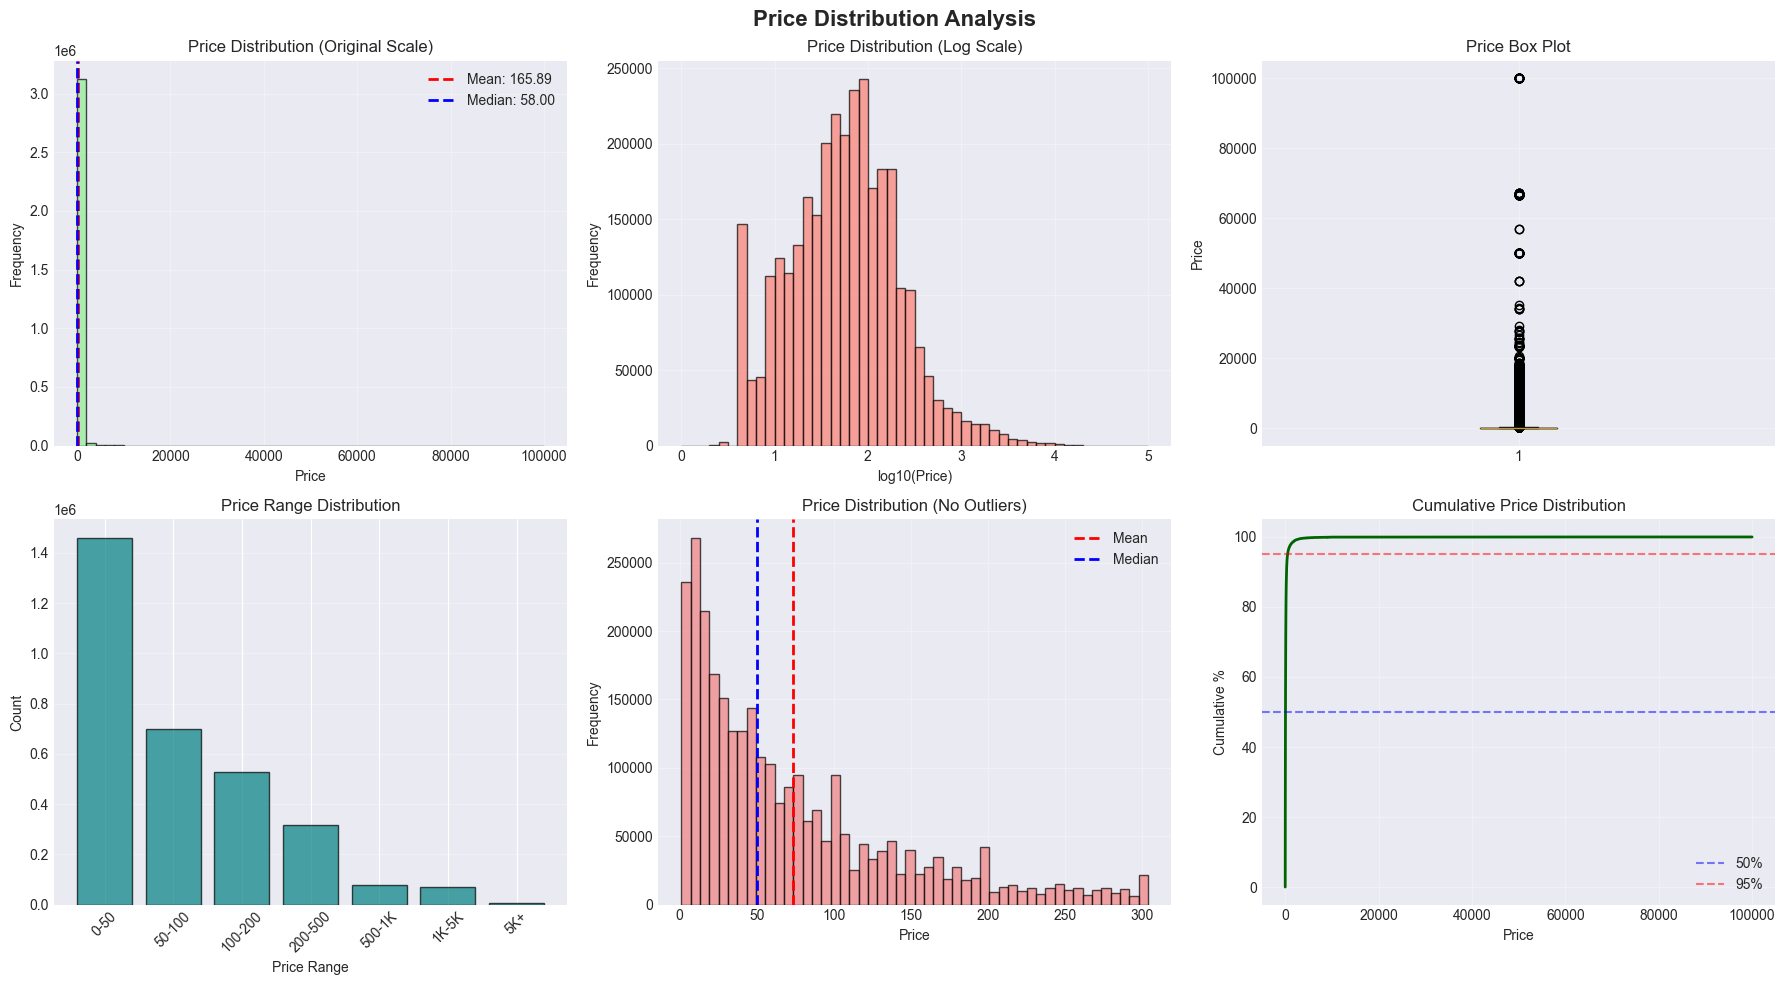

In [27]:
# Analyze Price Distribution
print("="*80)
print("PRICE DISTRIBUTION ANALYSIS")
print("="*80)

if price_cols:
    price_col = price_cols[0]
    price_data = df[price_col].dropna()
    price_data = price_data[price_data > 0]  # Remove zero prices
    
    print(f"\nPrice Statistics:")
    print(f"  Count: {len(price_data):,}")
    print(f"  Mean: {price_data.mean():.2f}")
    print(f"  Median: {price_data.median():.2f}")
    print(f"  Std Dev: {price_data.std():.2f}")
    print(f"  Min: {price_data.min():.2f}")
    print(f"  Max: {price_data.max():.2f}")
    print(f"  25th percentile: {price_data.quantile(0.25):.2f}")
    print(f"  75th percentile: {price_data.quantile(0.75):.2f}")
    
    # Price ranges
    print(f"\nPrice Range Distribution:")
    if price_data.max() > 1000:
        bins = [0, 50, 100, 200, 500, 1000, 5000, price_data.max()]
        labels = ['0-50', '50-100', '100-200', '200-500', '500-1K', '1K-5K', '5K+']
    else:
        bins = [0, 20, 50, 100, 200, price_data.max()]
        labels = ['0-20', '20-50', '50-100', '100-200', '200+']
    
    price_ranges = pd.cut(price_data, bins=bins, labels=labels, include_lowest=True)
    range_counts = price_ranges.value_counts().sort_index()
    for range_label, count in range_counts.items():
        print(f"  {range_label}: {count:,} ({count/len(price_data)*100:.2f}%)")
    
    # Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Price Distribution Analysis', fontsize=16, fontweight='bold')
    
    # 1. Histogram (original scale)
    axes[0, 0].hist(price_data, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(price_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {price_data.mean():.2f}')
    axes[0, 0].axvline(price_data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {price_data.median():.2f}')
    axes[0, 0].set_title('Price Distribution (Original Scale)')
    axes[0, 0].set_xlabel('Price')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Histogram (log scale)
    axes[0, 1].hist(np.log10(price_data), bins=50, color='salmon', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Price Distribution (Log Scale)')
    axes[0, 1].set_xlabel('log10(Price)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Box plot
    axes[0, 2].boxplot(price_data, vert=True)
    axes[0, 2].set_title('Price Box Plot')
    axes[0, 2].set_ylabel('Price')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Price range bar chart
    axes[1, 0].bar(range(len(range_counts)), range_counts.values, color='teal', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xticks(range(len(range_counts)))
    axes[1, 0].set_xticklabels(range_counts.index, rotation=45)
    axes[1, 0].set_title('Price Range Distribution')
    axes[1, 0].set_xlabel('Price Range')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # 5. Without outliers (IQR method)
    q1, q3 = price_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    price_no_outliers = price_data[(price_data >= lower) & (price_data <= upper)]
    
    axes[1, 1].hist(price_no_outliers, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1, 1].axvline(price_no_outliers.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[1, 1].axvline(price_no_outliers.median(), color='blue', linestyle='--', linewidth=2, label='Median')
    axes[1, 1].set_title('Price Distribution (No Outliers)')
    axes[1, 1].set_xlabel('Price')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Cumulative distribution
    sorted_prices = np.sort(price_data)
    cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices) * 100
    axes[1, 2].plot(sorted_prices, cumulative, linewidth=2, color='darkgreen')
    axes[1, 2].axhline(50, color='blue', linestyle='--', alpha=0.5, label='50%')
    axes[1, 2].axhline(95, color='red', linestyle='--', alpha=0.5, label='95%')
    axes[1, 2].set_title('Cumulative Price Distribution')
    axes[1, 2].set_xlabel('Price')
    axes[1, 2].set_ylabel('Cumulative %')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No price column found")

### 5.3 Correlation Analysis - Heatmaps

CORRELATION ANALYSIS - ALL NUMERIC VARIABLES

Analyzing correlations for 16 numeric variables

Top 10 Strongest Positive Correlations:
avgsku_price  price         0.992239
ratings       likes         0.540330
id            shop_id       0.527532
sold          ratings       0.348178
soldday       revenueday    0.347861
new_ratings   ratings       0.274325
sold          likes         0.176932
likes         new_likes     0.146549
avgsku_price  shop_id       0.095114
price         shop_id       0.092935
dtype: float64

Top 10 Strongest Negative Correlations:
sku                 id            -0.033679
sold                shop_id       -0.038739
product_sales_rate  rating_star   -0.039706
avgsku_price        sku           -0.041662
price               sku           -0.043920
sold                id            -0.061783
likes               shop_id       -0.109996
ratings             shop_id       -0.119930
likes               id            -0.151840
ratings             id            -0.157349

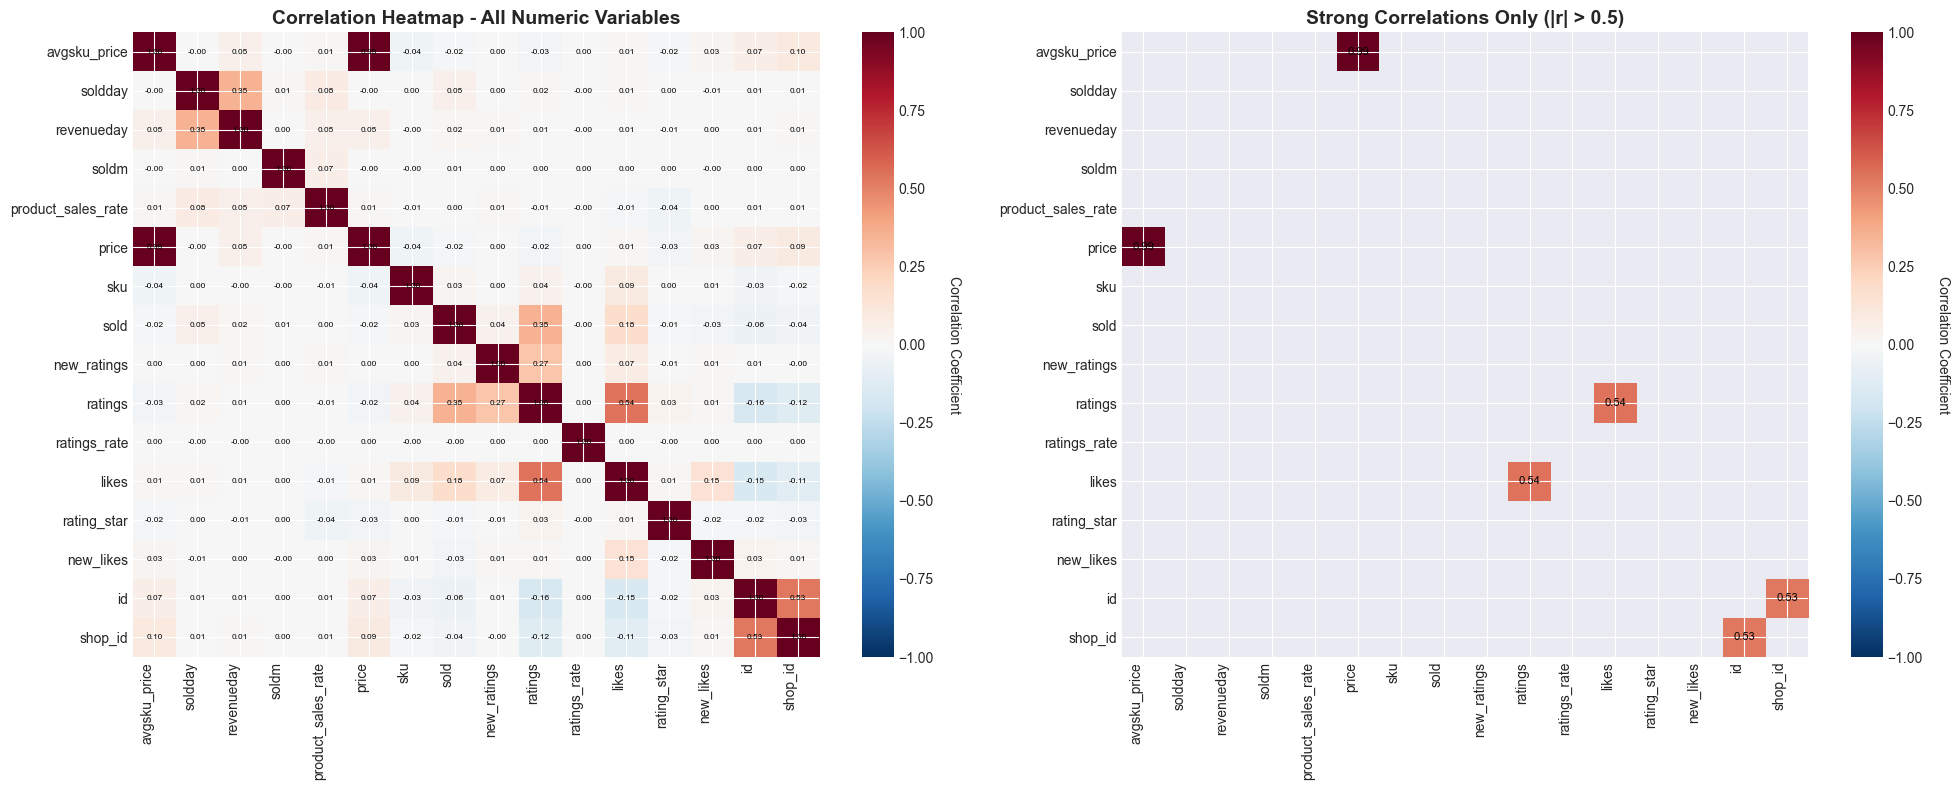


Correlation Summary:
  Strong positive correlations (r > 0.7): 1
  Moderate positive correlations (0.5 < r ≤ 0.7): 2
  Weak correlations (|r| ≤ 0.5): 117
  Moderate negative correlations (-0.7 ≤ r < -0.5): 0
  Strong negative correlations (r < -0.7): 0


In [28]:
# Correlation Analysis - All Numeric Variables
print("="*80)
print("CORRELATION ANALYSIS - ALL NUMERIC VARIABLES")
print("="*80)

# Get all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nAnalyzing correlations for {len(numeric_cols)} numeric variables")

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

print("\nTop 10 Strongest Positive Correlations:")
# Get upper triangle of correlation matrix
corr_pairs = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
corr_pairs = corr_pairs.stack().sort_values(ascending=False)
print(corr_pairs.head(10))

print("\nTop 10 Strongest Negative Correlations:")
print(corr_pairs.tail(10))

# Visualization 1: Full correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1: All correlations
im1 = axes[0].imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[0].set_xticks(range(len(numeric_cols)))
axes[0].set_yticks(range(len(numeric_cols)))
axes[0].set_xticklabels(numeric_cols, rotation=90, ha='right')
axes[0].set_yticklabels(numeric_cols)
axes[0].set_title('Correlation Heatmap - All Numeric Variables', fontsize=14, fontweight='bold')

# Add colorbar
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Add correlation values to cells
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = axes[0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black", fontsize=6)

# Heatmap 2: Strong correlations only (|r| > 0.5)
strong_corr_mask = (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1.0)
strong_corr = correlation_matrix.where(strong_corr_mask)

im2 = axes[1].imshow(strong_corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks(range(len(numeric_cols)))
axes[1].set_yticks(range(len(numeric_cols)))
axes[1].set_xticklabels(numeric_cols, rotation=90, ha='right')
axes[1].set_yticklabels(numeric_cols)
axes[1].set_title('Strong Correlations Only (|r| > 0.5)', fontsize=14, fontweight='bold')

# Add colorbar
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('Correlation Coefficient', rotation=270, labelpad=20)

# Add correlation values for strong correlations
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        if not np.isnan(strong_corr.iloc[i, j]):
            text = axes[1].text(j, i, f'{strong_corr.iloc[i, j]:.2f}',
                               ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Correlation Summary:")
print(f"  Strong positive correlations (r > 0.7): {(corr_pairs > 0.7).sum()}")
print(f"  Moderate positive correlations (0.5 < r ≤ 0.7): {((corr_pairs > 0.5) & (corr_pairs <= 0.7)).sum()}")
print(f"  Weak correlations (|r| ≤ 0.5): {(corr_pairs.abs() <= 0.5).sum()}")
print(f"  Moderate negative correlations (-0.7 ≤ r < -0.5): {((corr_pairs < -0.5) & (corr_pairs >= -0.7)).sum()}")
print(f"  Strong negative correlations (r < -0.7): {(corr_pairs < -0.7).sum()}")

ENHANCED CORRELATION HEATMAP (SEABORN)


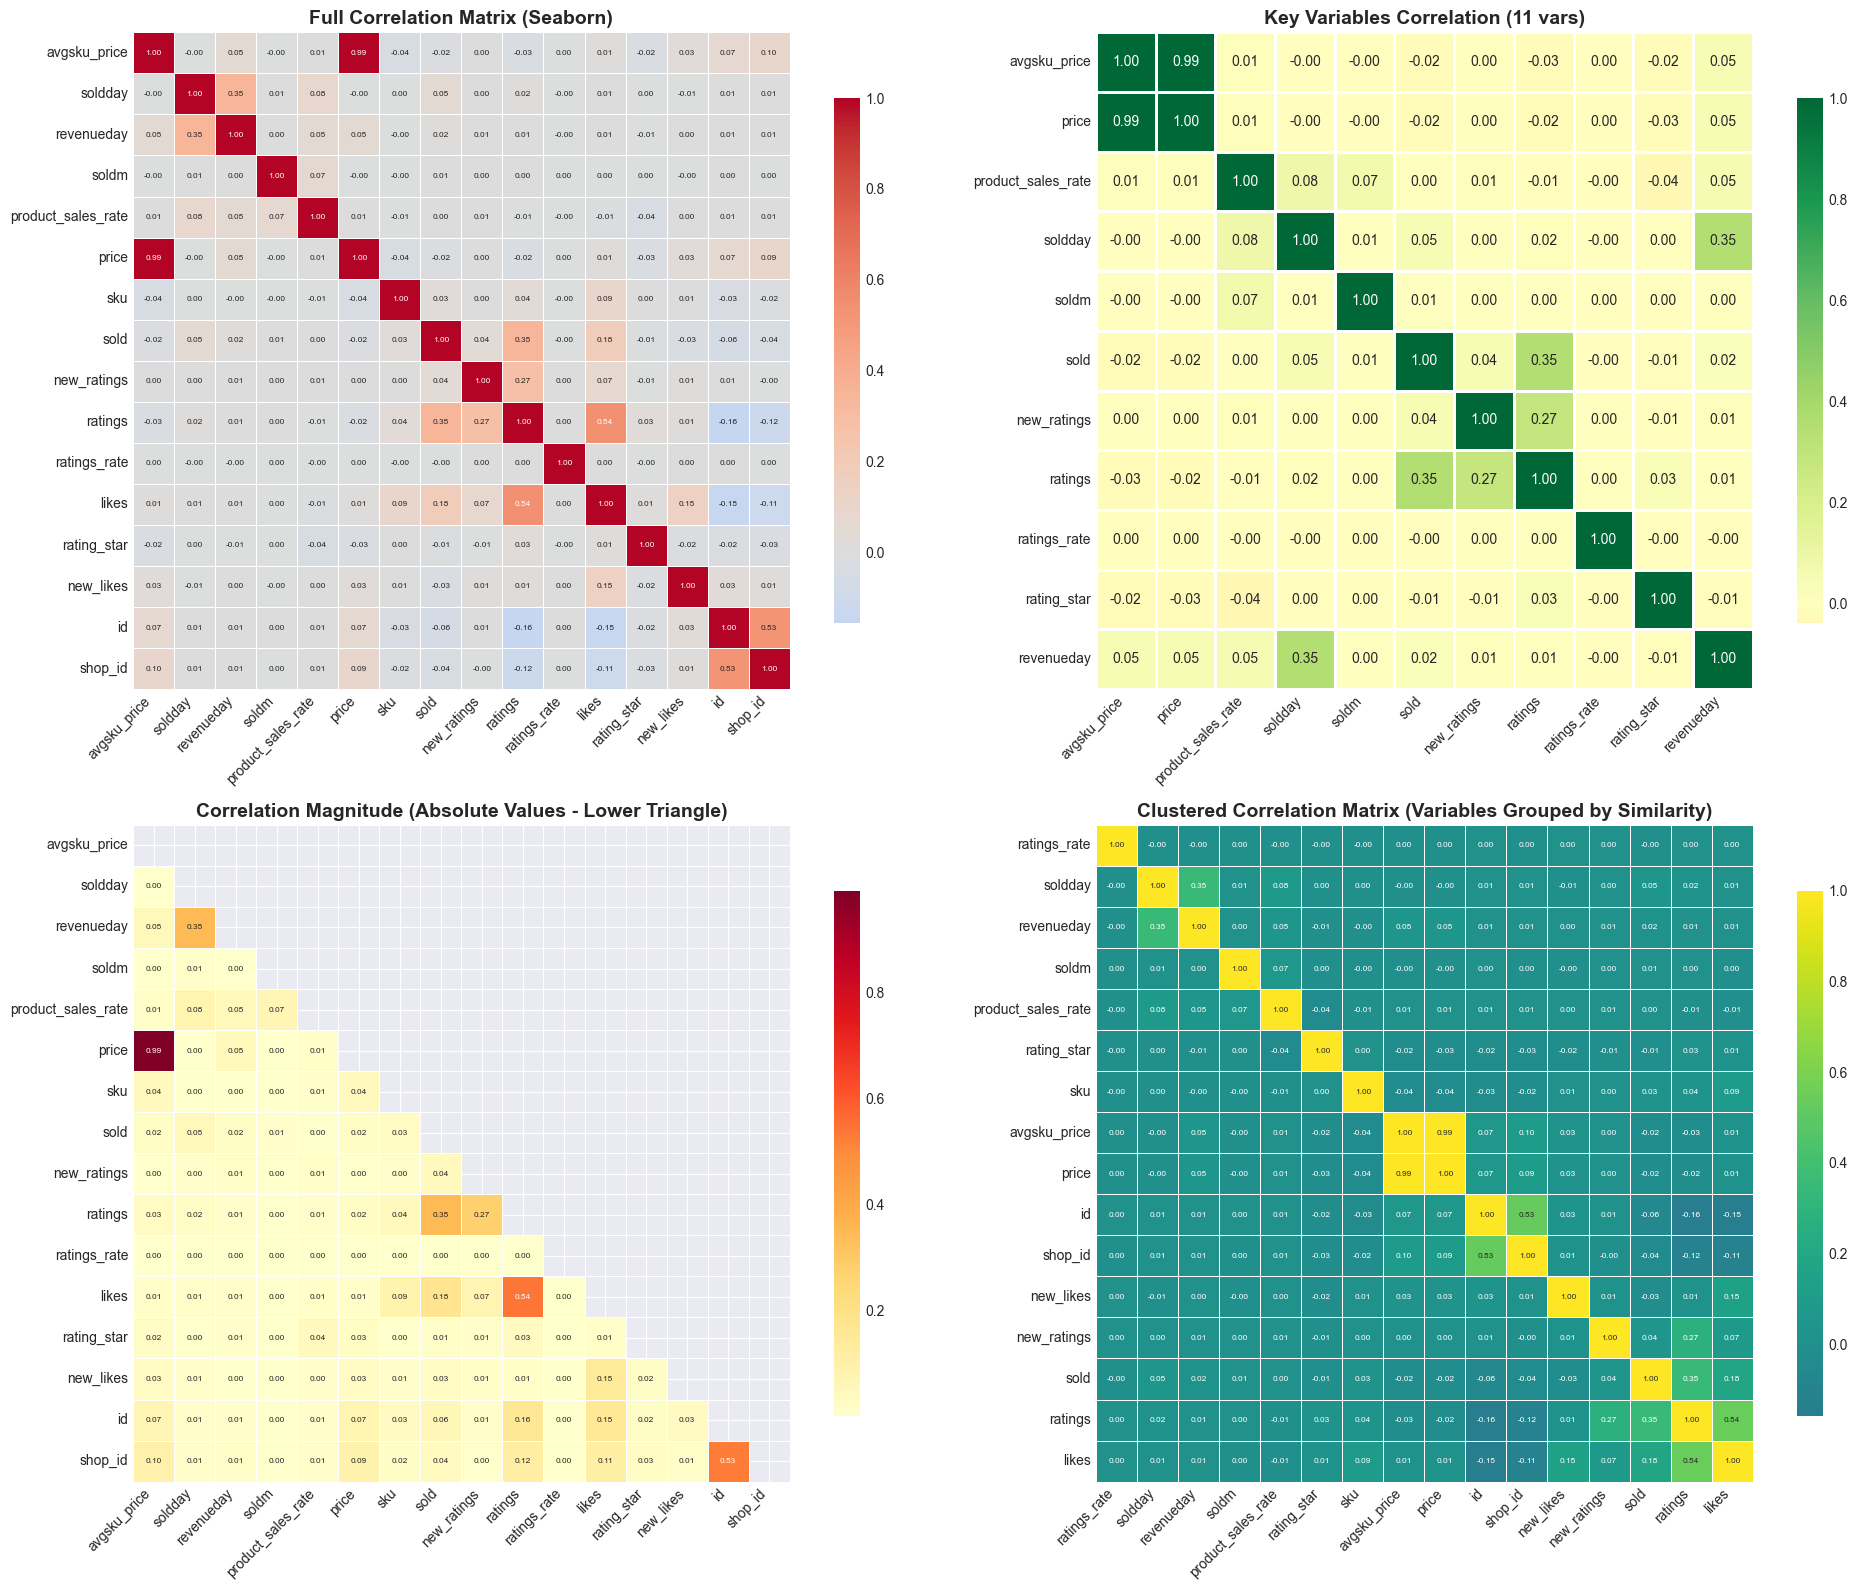


✅ Multiple correlation heatmap views generated
   • Full correlation matrix
   • Key variables correlation
   • Absolute correlation magnitudes
   • Hierarchically clustered correlation


In [29]:
# Enhanced Correlation Heatmap using Seaborn
print("="*80)
print("ENHANCED CORRELATION HEATMAP (SEABORN)")
print("="*80)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Full correlation heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0, 0],
            annot_kws={'fontsize': 6})
axes[0, 0].set_title('Full Correlation Matrix (Seaborn)', fontsize=14, fontweight='bold')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0)

# 2. Correlation with key variables only
if key_vars:
    key_corr = df[key_vars].corr()
    sns.heatmap(key_corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0, 1],
                annot_kws={'fontsize': 10})
    axes[0, 1].set_title(f'Key Variables Correlation ({len(key_vars)} vars)', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
    axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), rotation=0)
else:
    axes[0, 1].text(0.5, 0.5, 'No key variables identified', ha='center', va='center', fontsize=12)
    axes[0, 1].set_title('Key Variables Correlation', fontsize=14, fontweight='bold')

# 3. Correlation magnitude heatmap (absolute values)
abs_corr = correlation_matrix.abs()
mask = np.triu(np.ones_like(abs_corr, dtype=bool))  # Mask upper triangle
sns.heatmap(abs_corr, mask=mask, annot=True, fmt='.2f', cmap='YlOrRd',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[1, 0],
            annot_kws={'fontsize': 6})
axes[1, 0].set_title('Correlation Magnitude (Absolute Values - Lower Triangle)', fontsize=14, fontweight='bold')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), rotation=0)

# 4. Clustered correlation heatmap
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Convert correlation to distance matrix and perform hierarchical clustering
distance_matrix = 1 - correlation_matrix.abs()
linkage_matrix = linkage(squareform(distance_matrix), method='average')

# Reorder correlation matrix based on clustering
from scipy.cluster.hierarchy import leaves_list
dendro_order = leaves_list(linkage_matrix)
clustered_corr = correlation_matrix.iloc[dendro_order, dendro_order]

sns.heatmap(clustered_corr, annot=True, fmt='.2f', cmap='viridis', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[1, 1],
            annot_kws={'fontsize': 6})
axes[1, 1].set_title('Clustered Correlation Matrix (Variables Grouped by Similarity)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("\n✅ Multiple correlation heatmap views generated")
print("   • Full correlation matrix")
print("   • Key variables correlation")
print("   • Absolute correlation magnitudes")
print("   • Hierarchically clustered correlation")

In [30]:


# Interactive Correlation Heatmap with Plotly
print("="*80)
print("INTERACTIVE CORRELATION HEATMAP")
print("="*80)

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.values,
    texttemplate='%{text:.2f}',
    textfont={"size": 8},
    colorbar=dict(title="Correlation")
))

fig.update_layout(
    title='Interactive Correlation Heatmap - Hover for Details',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=1000,
    height=900,
    xaxis={'tickangle': 45},
    font=dict(size=10)
)

fig.show()

print("\n✅ Interactive heatmap generated (hover over cells for details)")

# Create interactive heatmap for key variables only
if key_vars and len(key_vars) > 1:
    key_corr = df[key_vars].corr()
    
    fig2 = go.Figure(data=go.Heatmap(
        z=key_corr.values,
        x=key_corr.columns,
        y=key_corr.index,
        colorscale='RdYlGn',
        zmid=0,
        text=key_corr.values,
        texttemplate='%{text:.3f}',
        textfont={"size": 12},
        colorbar=dict(title="Correlation")
    ))
    
    fig2.update_layout(
        title=f'Interactive Correlation Heatmap - Key Variables Only ({len(key_vars)} variables)',
        xaxis_title='Variables',
        yaxis_title='Variables',
        width=800,
        height=700,
        xaxis={'tickangle': 45},
        font=dict(size=12)
    )
    
    fig2.show()
    print("✅ Interactive key variables heatmap generated")

INTERACTIVE CORRELATION HEATMAP



✅ Interactive heatmap generated (hover over cells for details)


✅ Interactive key variables heatmap generated


### 5.4 Category Analysis and Trends

In [31]:
# Identify categorical variables in the dataset
print("="*80)
print("IDENTIFYING CATEGORICAL VARIABLES")
print("="*80)

# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns found ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  • {col}: {unique_count:,} unique values")

# Identify main category columns (typically have fewer unique values)
main_category_cols = [col for col in categorical_cols if df[col].nunique() < 100 and df[col].nunique() > 1]

print(f"\n📊 Main category columns for analysis ({len(main_category_cols)}):")
for col in main_category_cols:
    print(f"  • {col}")

if not main_category_cols:
    print("\n⚠️ No suitable category columns found (using all categorical columns)")
    main_category_cols = categorical_cols[:3]  # Use first 3 if available

IDENTIFYING CATEGORICAL VARIABLES

Categorical columns found (12):
Categorical columns found (12):

  • product: 125,947 unique values
  • toplevel_category: 30 unique values
  • secondlevel_category: 211 unique values
  • product: 125,947 unique values
  • toplevel_category: 30 unique values
  • secondlevel_category: 211 unique values
  • thirdlevel_category: 847 unique values
  • fourthlevel_category: 328 unique values
  • fifthlevel_category: 27 unique values
  • brand: 3,891 unique values
  • brand_id: 4,063 unique values
  • thirdlevel_category: 847 unique values
  • fourthlevel_category: 328 unique values
  • fifthlevel_category: 27 unique values
  • brand: 3,891 unique values
  • brand_id: 4,063 unique values
  • shop: 29,407 unique values
  • seller_from: 2 unique values
  • shop: 29,407 unique values
  • seller_from: 2 unique values
  • link: 125,947 unique values
  • joined: 3,269 unique values
  • link: 125,947 unique values
  • joined: 3,269 unique values

📊 Main category c

CATEGORY DISTRIBUTION ANALYSIS

Analyzing Category: TOPLEVEL_CATEGORY

Top 10 categories by frequency:
  1. Home & Living: 697,798 (22.10%)
  2. Beauty: 343,576 (10.88%)
  3. Women Clothes: 253,751 (8.04%)
  4. Stationery: 208,375 (6.60%)
  5. Mobile & Gadgets: 179,470 (5.68%)
  6. Fashion Accessories: 155,505 (4.92%)
  7. Health: 140,214 (4.44%)
  8. Baby & Kids Fashion: 125,443 (3.97%)
  9. Mom & Baby: 122,402 (3.88%)
  10. Men Clothes: 106,743 (3.38%)


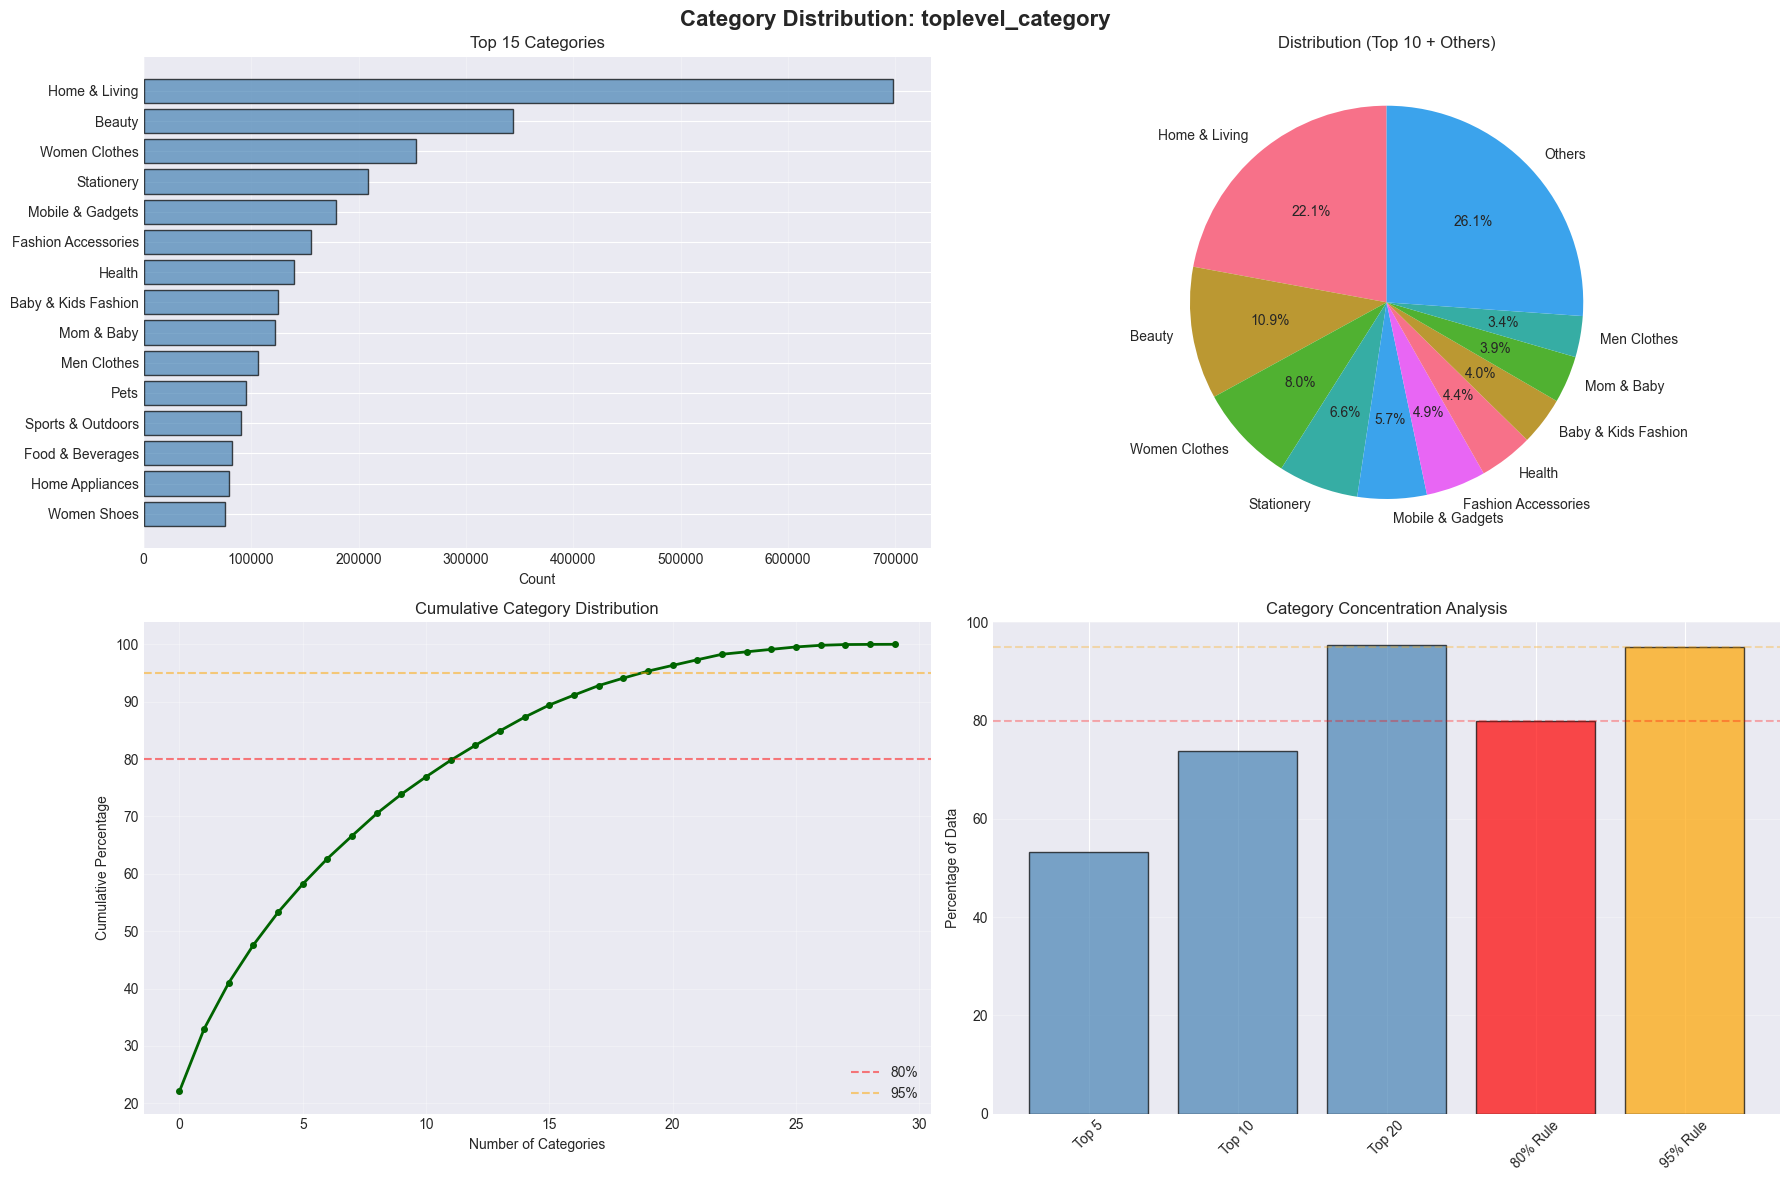


💡 Category Insights:
   • Total categories: 30
   • Top 5 categories account for: 53.3% of data
   • Categories needed for 80% of data: 12
   • Categories needed for 95% of data: 19

Analyzing Category: FIFTHLEVEL_CATEGORY

Top 10 categories by frequency:
  1. -: 3,126,685 (99.01%)
  2. shirts: 9,761 (0.31%)
  3. Bottles & Bottle accessories: 5,418 (0.17%)
  4. Instant Noodles: 3,020 (0.10%)
  5. off Machines & Grinders: 2,766 (0.09%)
  6. functional Groomers: 2,076 (0.07%)
  7. Chew, Bones & Balls: 1,899 (0.06%)
  8. Bottle Cleansing: 1,568 (0.05%)
  9. ons: 964 (0.03%)
  10. Piece Swimsuits: 887 (0.03%)


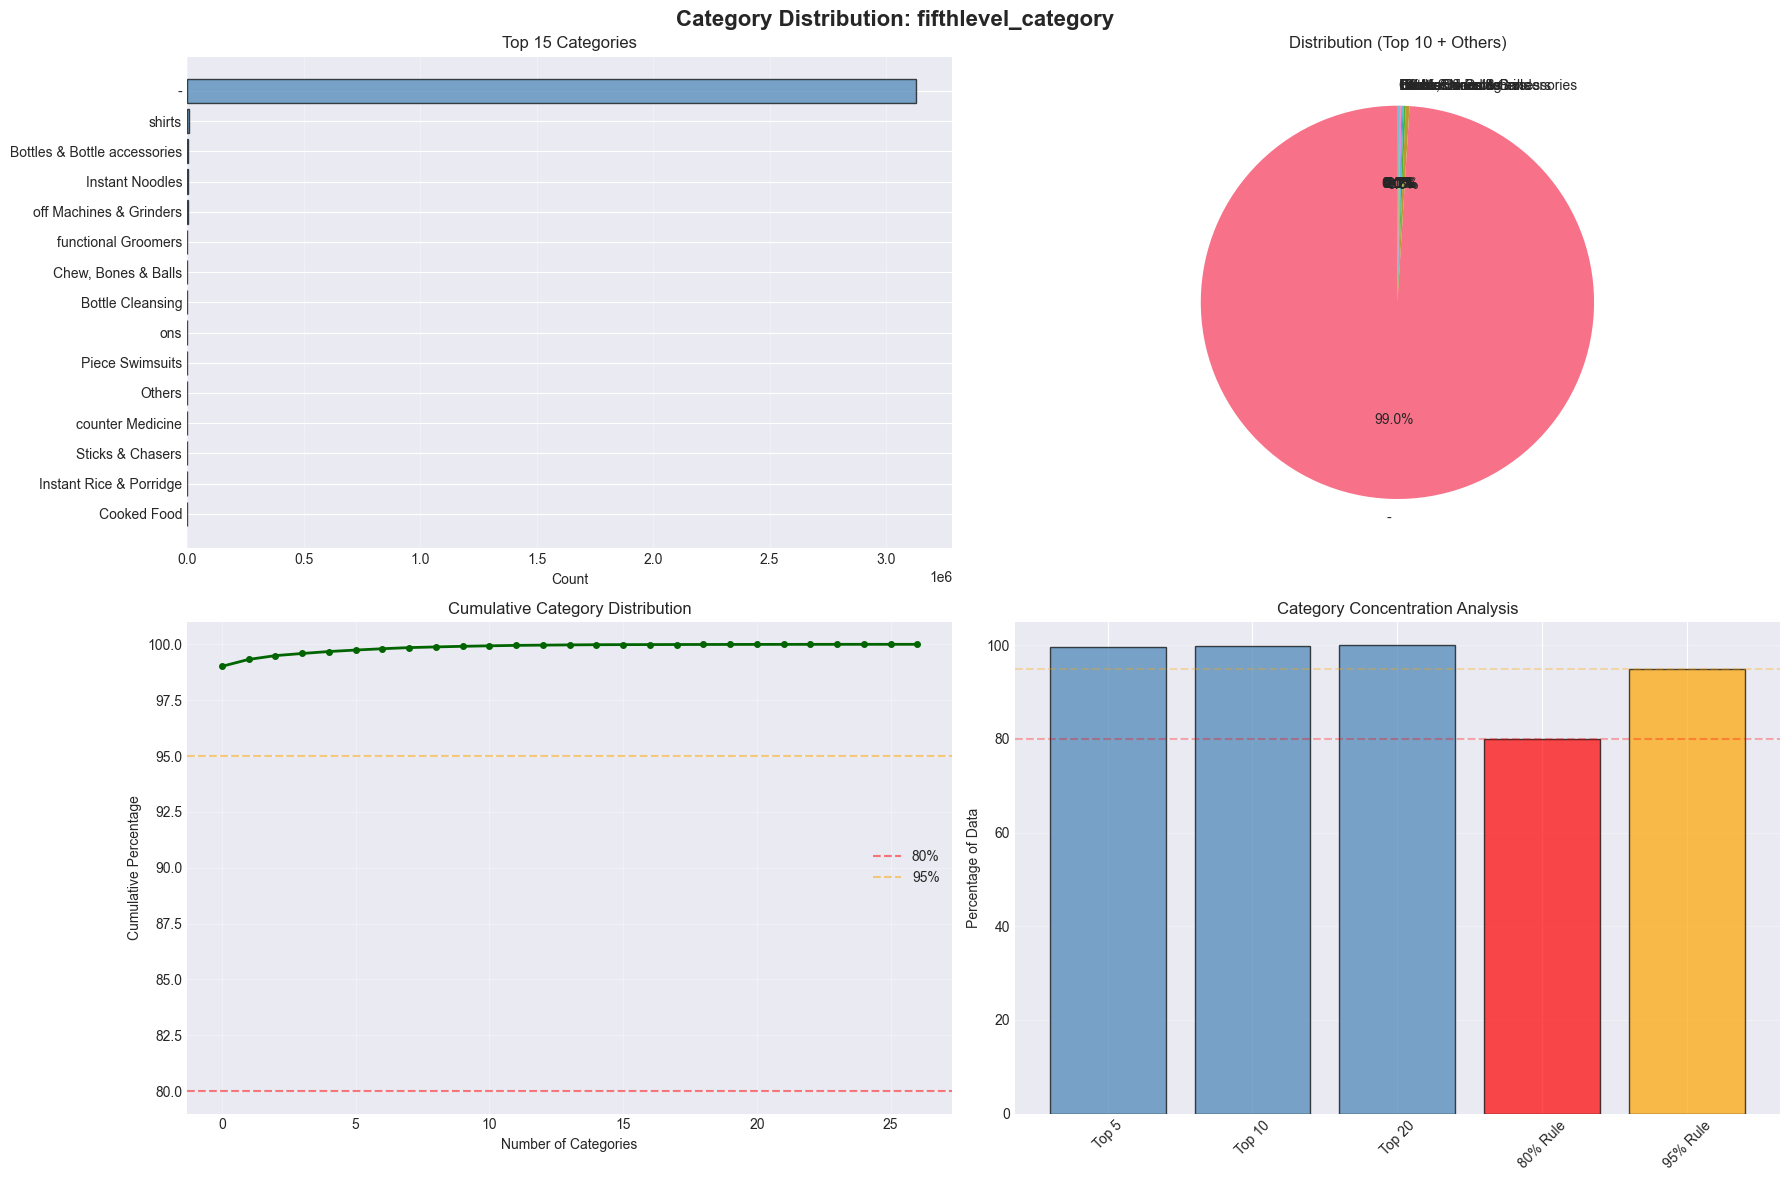


💡 Category Insights:
   • Total categories: 27
   • Top 5 categories account for: 99.7% of data
   • Categories needed for 80% of data: 0
   • Categories needed for 95% of data: 0


In [32]:
# Category Distribution Analysis
print("="*80)
print("CATEGORY DISTRIBUTION ANALYSIS")
print("="*80)

if main_category_cols:
    for cat_col in main_category_cols[:2]:  # Analyze first 2 category columns
        print(f"\n{'='*80}")
        print(f"Analyzing Category: {cat_col.upper()}")
        print(f"{'='*80}")
        
        # Get value counts
        category_counts = df[cat_col].value_counts()
        print(f"\nTop 10 categories by frequency:")
        for idx, (category, count) in enumerate(category_counts.head(10).items(), 1):
            print(f"  {idx}. {category}: {count:,} ({count/len(df)*100:.2f}%)")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        fig.suptitle(f'Category Distribution: {cat_col}', fontsize=16, fontweight='bold')
        
        # 1. Bar chart - Top 15 categories
        top_n = min(15, len(category_counts))
        axes[0, 0].barh(range(top_n), category_counts.head(top_n).values, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0, 0].set_yticks(range(top_n))
        axes[0, 0].set_yticklabels(category_counts.head(top_n).index)
        axes[0, 0].set_xlabel('Count')
        axes[0, 0].set_title(f'Top {top_n} Categories')
        axes[0, 0].invert_yaxis()
        axes[0, 0].grid(True, alpha=0.3, axis='x')
        
        # 2. Pie chart - Top 10 categories
        top_10 = category_counts.head(10)
        others = category_counts.iloc[10:].sum() if len(category_counts) > 10 else 0
        
        if others > 0:
            pie_data = pd.concat([top_10, pd.Series({'Others': others})])
        else:
            pie_data = top_10
        
        axes[0, 1].pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
        axes[0, 1].set_title('Distribution (Top 10 + Others)')
        
        # 3. Cumulative distribution
        cumulative_pct = (category_counts.cumsum() / category_counts.sum() * 100).values
        axes[1, 0].plot(range(len(cumulative_pct)), cumulative_pct, linewidth=2, color='darkgreen', marker='o', markersize=4)
        axes[1, 0].axhline(80, color='red', linestyle='--', alpha=0.5, label='80%')
        axes[1, 0].axhline(95, color='orange', linestyle='--', alpha=0.5, label='95%')
        axes[1, 0].set_xlabel('Number of Categories')
        axes[1, 0].set_ylabel('Cumulative Percentage')
        axes[1, 0].set_title('Cumulative Category Distribution')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Category concentration analysis
        # Calculate how many categories account for 80% of data
        categories_80 = (cumulative_pct <= 80).sum()
        categories_95 = (cumulative_pct <= 95).sum()
        
        concentration_data = {
            'Top 5': category_counts.head(5).sum() / category_counts.sum() * 100,
            'Top 10': category_counts.head(10).sum() / category_counts.sum() * 100,
            'Top 20': category_counts.head(20).sum() / category_counts.sum() * 100 if len(category_counts) >= 20 else 100,
            '80% Rule': 80,
            '95% Rule': 95
        }
        
        axes[1, 1].bar(concentration_data.keys(), concentration_data.values(), color=['steelblue']*3 + ['red', 'orange'], 
                       edgecolor='black', alpha=0.7)
        axes[1, 1].set_ylabel('Percentage of Data')
        axes[1, 1].set_title('Category Concentration Analysis')
        axes[1, 1].axhline(80, color='red', linestyle='--', alpha=0.3)
        axes[1, 1].axhline(95, color='orange', linestyle='--', alpha=0.3)
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n💡 Category Insights:")
        print(f"   • Total categories: {len(category_counts)}")
        print(f"   • Top 5 categories account for: {concentration_data['Top 5']:.1f}% of data")
        print(f"   • Categories needed for 80% of data: {categories_80}")
        print(f"   • Categories needed for 95% of data: {categories_95}")
else:
    print("⚠️ No categorical columns available for analysis")

CATEGORY TRENDS OVER TIME

Time-based Trends for: TOPLEVEL_CATEGORY


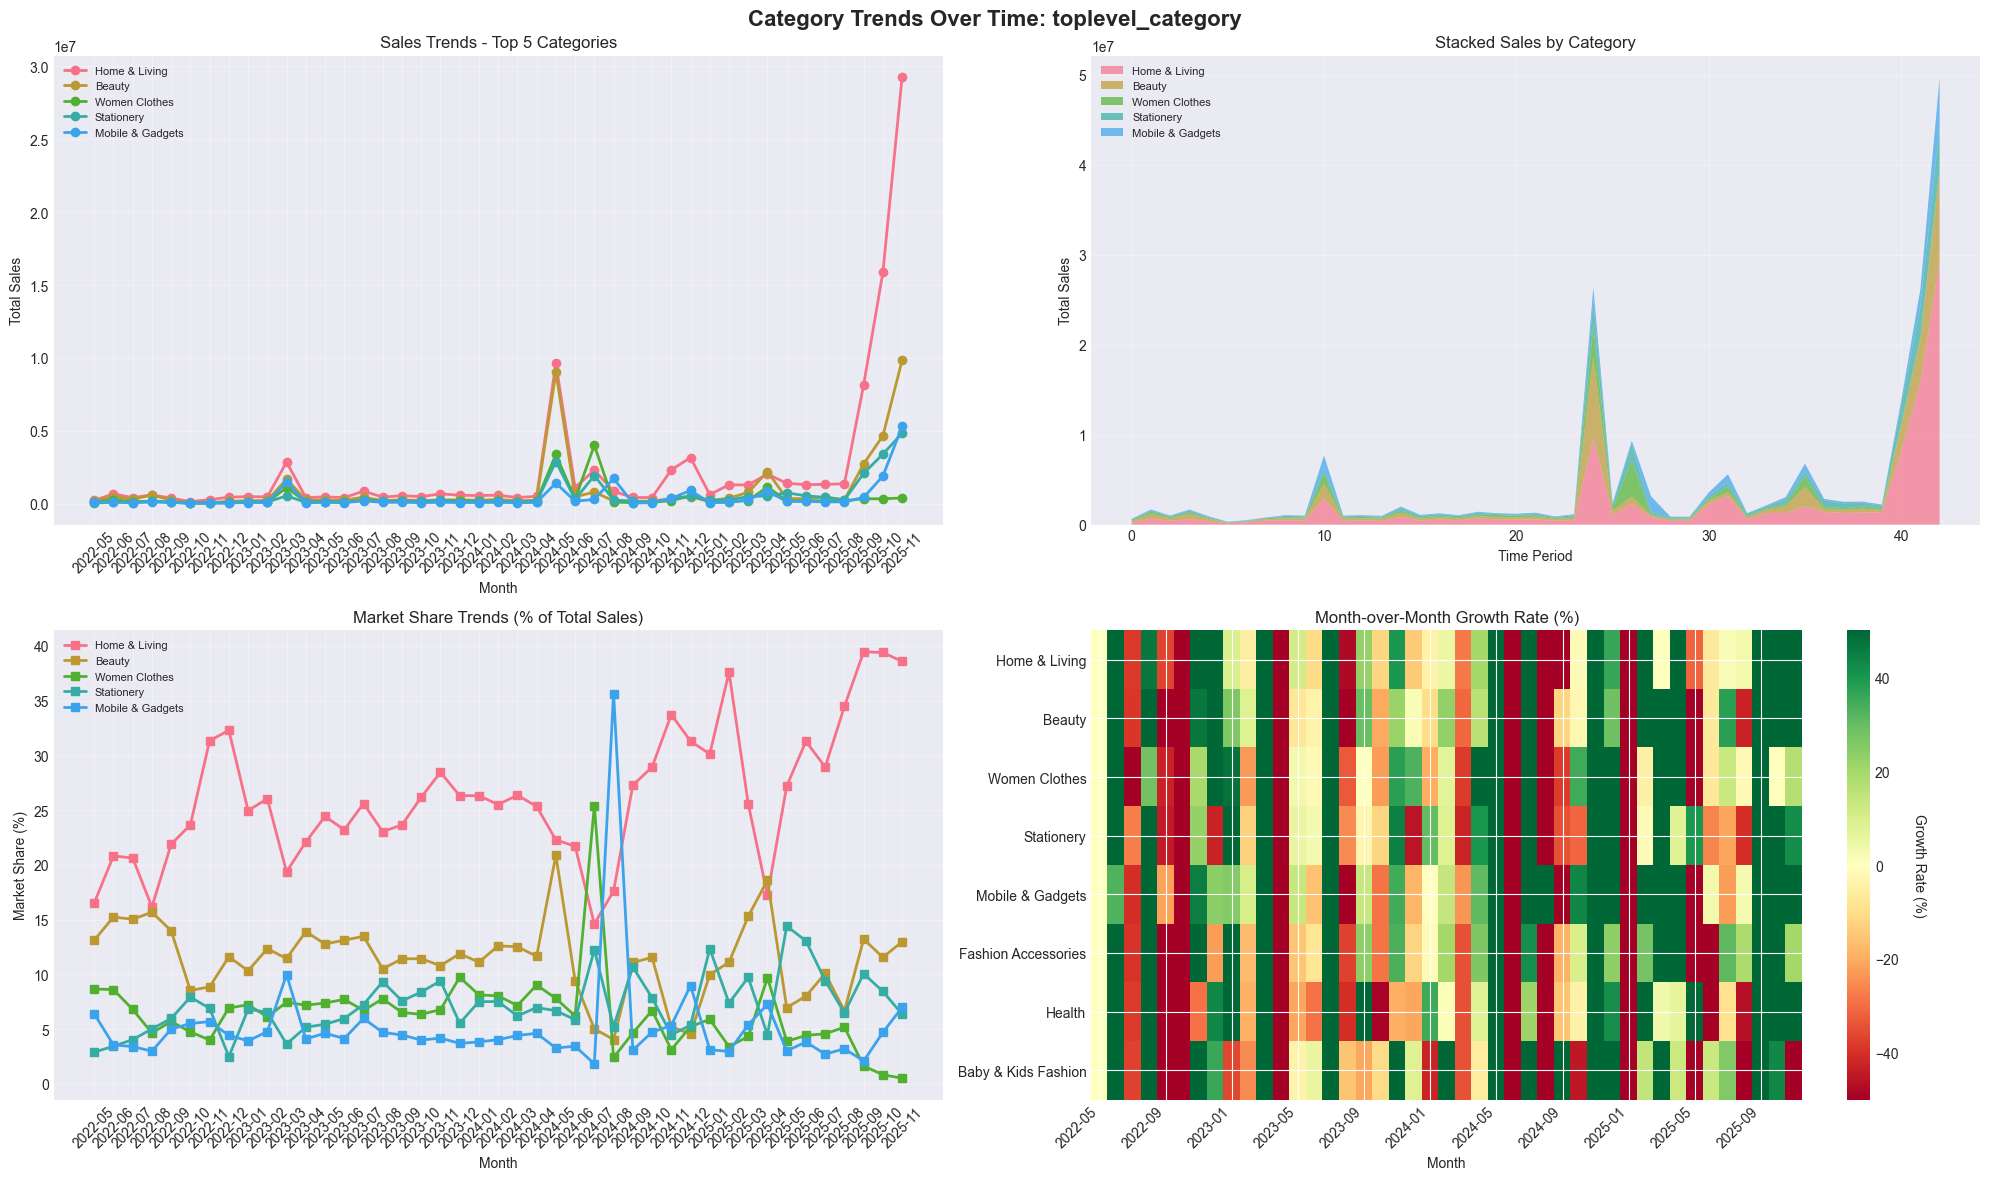


📈 Trend Summary:
   • Home & Living: Growing (+12914.8% overall change)
   • Beauty: Growing (+5414.8% overall change)
   • Women Clothes: Growing (+234.7% overall change)
   • Stationery: Growing (+12112.0% overall change)
   • Mobile & Gadgets: Growing (+5979.0% overall change)

Time-based Trends for: FIFTHLEVEL_CATEGORY


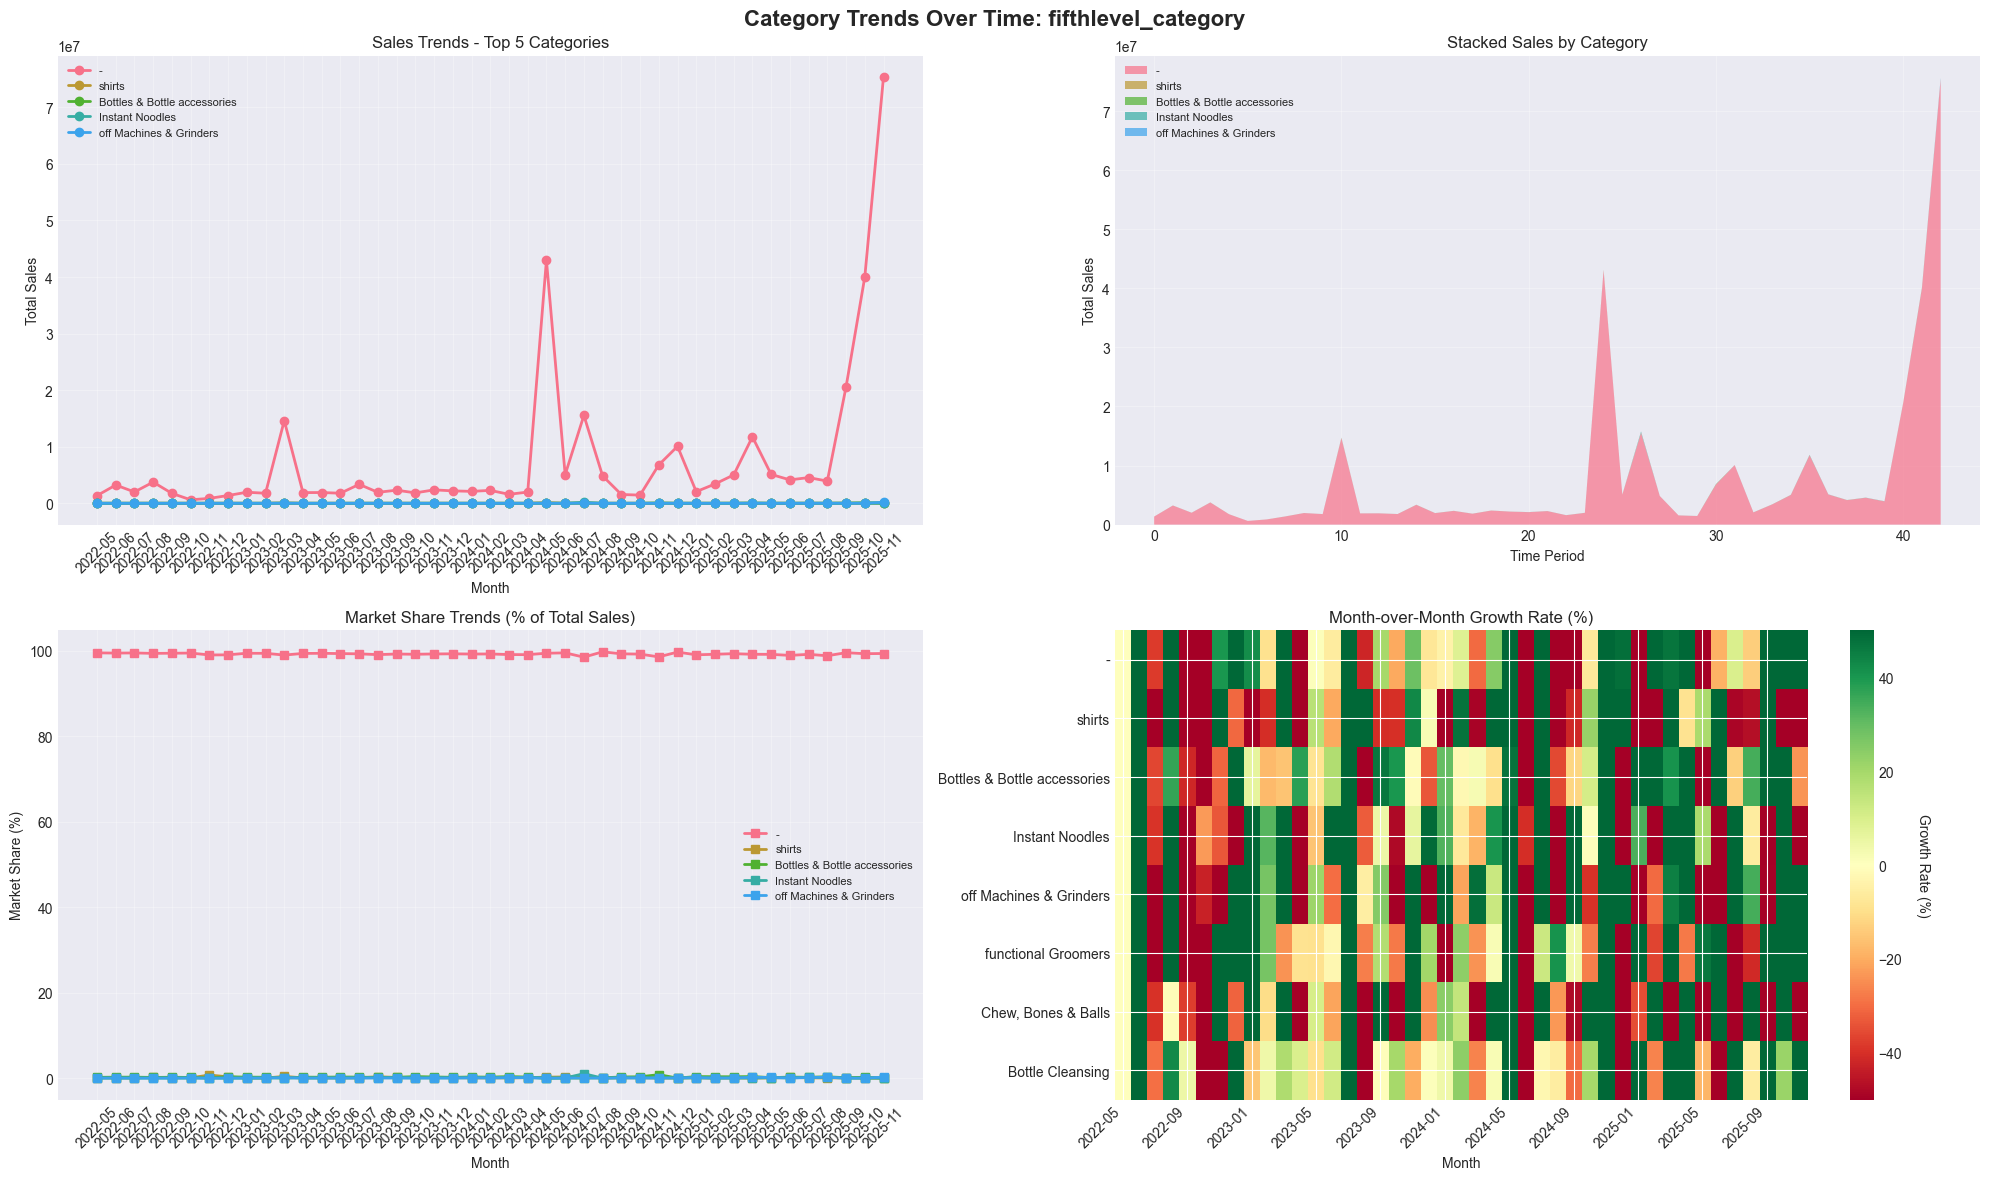


📈 Trend Summary:
   • -: Growing (+5463.5% overall change)
   • shirts: Declining (-89.5% overall change)
   • Bottles & Bottle accessories: Growing (+2342.9% overall change)
   • Instant Noodles: Growing (+408.9% overall change)
   • off Machines & Grinders: Growing (+28906.9% overall change)


In [33]:
# Category Trends Over Time
print("="*80)
print("CATEGORY TRENDS OVER TIME")
print("="*80)

if main_category_cols and primary_date_col:
    for cat_col in main_category_cols[:2]:  # Analyze first 2 categories
        print(f"\n{'='*80}")
        print(f"Time-based Trends for: {cat_col.upper()}")
        print(f"{'='*80}")
        
        # Get top categories for trend analysis
        top_categories = df[cat_col].value_counts().head(10).index.tolist()
        
        # Create monthly aggregation by category
        df['year_month'] = df[primary_date_col].dt.to_period('M')
        
        # Calculate metrics by category and month
        if sales_cols:
            sales_col = sales_cols[0]
            monthly_category_sales = df.groupby(['year_month', cat_col])[sales_col].sum().reset_index()
            monthly_category_sales['year_month'] = monthly_category_sales['year_month'].astype(str)
            
            # Filter to top categories
            monthly_top = monthly_category_sales[monthly_category_sales[cat_col].isin(top_categories)]
            
            # Visualizations
            fig, axes = plt.subplots(2, 2, figsize=(20, 12))
            fig.suptitle(f'Category Trends Over Time: {cat_col}', fontsize=16, fontweight='bold')
            
            # 1. Line plot - Sales trends for top categories
            for category in top_categories[:5]:  # Top 5 for clarity
                category_data = monthly_top[monthly_top[cat_col] == category]
                axes[0, 0].plot(category_data['year_month'], category_data[sales_col], 
                               marker='o', linewidth=2, label=category)
            
            axes[0, 0].set_title(f'Sales Trends - Top 5 Categories')
            axes[0, 0].set_xlabel('Month')
            axes[0, 0].set_ylabel('Total Sales')
            axes[0, 0].legend(loc='best', fontsize=8)
            axes[0, 0].grid(True, alpha=0.3)
            axes[0, 0].tick_params(axis='x', rotation=45)
            
            # 2. Stacked area chart
            pivot_data = monthly_top.pivot(index='year_month', columns=cat_col, values=sales_col).fillna(0)
            pivot_data = pivot_data[top_categories[:5]]  # Top 5
            
            axes[0, 1].stackplot(range(len(pivot_data)), 
                                *[pivot_data[col].values for col in pivot_data.columns],
                                labels=pivot_data.columns, alpha=0.7)
            axes[0, 1].set_title('Stacked Sales by Category')
            axes[0, 1].set_xlabel('Time Period')
            axes[0, 1].set_ylabel('Total Sales')
            axes[0, 1].legend(loc='upper left', fontsize=8)
            axes[0, 1].grid(True, alpha=0.3)
            
            # 3. Market share over time
            monthly_total = monthly_category_sales.groupby('year_month')[sales_col].sum()
            
            for category in top_categories[:5]:
                category_data = monthly_top[monthly_top[cat_col] == category]
                category_share = []
                for month in category_data['year_month']:
                    month_sales = category_data[category_data['year_month'] == month][sales_col].values[0]
                    total_sales = monthly_total.loc[month]
                    category_share.append((month_sales / total_sales * 100) if total_sales > 0 else 0)
                
                axes[1, 0].plot(category_data['year_month'], category_share, 
                               marker='s', linewidth=2, label=category)
            
            axes[1, 0].set_title('Market Share Trends (% of Total Sales)')
            axes[1, 0].set_xlabel('Month')
            axes[1, 0].set_ylabel('Market Share (%)')
            axes[1, 0].legend(loc='best', fontsize=8)
            axes[1, 0].grid(True, alpha=0.3)
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # 4. Growth rate heatmap
            # Calculate month-over-month growth for each category
            growth_data = []
            for category in top_categories[:8]:
                category_monthly = monthly_top[monthly_top[cat_col] == category].set_index('year_month')[sales_col]
                growth = category_monthly.pct_change() * 100
                growth_data.append(growth.fillna(0))
            
            if growth_data:
                growth_df = pd.DataFrame(growth_data, index=top_categories[:8]).T
                
                im = axes[1, 1].imshow(growth_df.T, cmap='RdYlGn', aspect='auto', vmin=-50, vmax=50)
                axes[1, 1].set_yticks(range(len(growth_df.columns)))
                axes[1, 1].set_yticklabels(growth_df.columns)
                axes[1, 1].set_xticks(range(0, len(growth_df), max(1, len(growth_df)//10)))
                axes[1, 1].set_xticklabels(growth_df.index[::max(1, len(growth_df)//10)], rotation=45, ha='right')
                axes[1, 1].set_title('Month-over-Month Growth Rate (%)')
                axes[1, 1].set_xlabel('Month')
                
                cbar = plt.colorbar(im, ax=axes[1, 1])
                cbar.set_label('Growth Rate (%)', rotation=270, labelpad=20)
            
            plt.tight_layout()
            plt.show()
            
            # Summary statistics
            print(f"\n📈 Trend Summary:")
            for category in top_categories[:5]:
                cat_data = monthly_top[monthly_top[cat_col] == category][sales_col]
                if len(cat_data) > 1:
                    trend = "Growing" if cat_data.iloc[-1] > cat_data.iloc[0] else "Declining"
                    change_pct = ((cat_data.iloc[-1] - cat_data.iloc[0]) / cat_data.iloc[0] * 100) if cat_data.iloc[0] != 0 else 0
                    print(f"   • {category}: {trend} ({change_pct:+.1f}% overall change)")
        
        else:
            print(f"⚠️ No sales data available for trend analysis")
            
else:
    print("⚠️ Category columns or date column not available")

In [34]:
# Interactive Category Trends with Plotly
print("="*80)
print("INTERACTIVE CATEGORY TRENDS")
print("="*80)

if main_category_cols and primary_date_col and sales_cols:
    cat_col = main_category_cols[0]
    sales_col = sales_cols[0]
    
    print(f"\nCreating interactive visualizations for: {cat_col}")
    
    # Get top categories
    top_categories = df[cat_col].value_counts().head(10).index.tolist()
    
    # Prepare data
    monthly_category_sales = df.groupby(['year_month', cat_col])[sales_col].sum().reset_index()
    monthly_category_sales['year_month'] = monthly_category_sales['year_month'].astype(str)
    monthly_top = monthly_category_sales[monthly_category_sales[cat_col].isin(top_categories)]
    
    # Interactive line chart
    fig1 = px.line(monthly_top, x='year_month', y=sales_col, color=cat_col,
                   title=f'Interactive Sales Trends by {cat_col}',
                   labels={'year_month': 'Month', sales_col: 'Total Sales'},
                   markers=True)
    fig1.update_layout(
        xaxis_title='Month',
        yaxis_title='Total Sales',
        hovermode='x unified',
        legend_title=cat_col,
        height=600
    )
    fig1.show()
    
    # Interactive stacked area chart
    pivot_data = monthly_top.pivot(index='year_month', columns=cat_col, values=sales_col).fillna(0)
    
    fig2 = go.Figure()
    for category in top_categories[:8]:
        if category in pivot_data.columns:
            fig2.add_trace(go.Scatter(
                x=pivot_data.index,
                y=pivot_data[category],
                mode='lines',
                name=category,
                stackgroup='one',
                fillcolor='rgba(0,0,0,0.1)'
            ))
    
    fig2.update_layout(
        title=f'Stacked Sales Trends by {cat_col}',
        xaxis_title='Month',
        yaxis_title='Total Sales',
        hovermode='x unified',
        height=600
    )
    fig2.show()
    
    # Interactive market share
    monthly_total = monthly_category_sales.groupby('year_month')[sales_col].sum().reset_index()
    monthly_total.columns = ['year_month', 'total_sales']
    
    market_share_data = monthly_top.merge(monthly_total, on='year_month')
    market_share_data['market_share'] = (market_share_data[sales_col] / market_share_data['total_sales'] * 100)
    
    fig3 = px.line(market_share_data, x='year_month', y='market_share', color=cat_col,
                   title=f'Market Share Trends by {cat_col} (%)',
                   labels={'year_month': 'Month', 'market_share': 'Market Share (%)'},
                   markers=True)
    fig3.update_layout(
        xaxis_title='Month',
        yaxis_title='Market Share (%)',
        hovermode='x unified',
        height=600
    )
    fig3.show()
    
    print("\n✅ Interactive category trend visualizations generated")
    print("   • Sales trends by category")
    print("   • Stacked area chart")
    print("   • Market share evolution")
else:
    print("⚠️ Required data not available for interactive trends")

INTERACTIVE CATEGORY TRENDS

Creating interactive visualizations for: toplevel_category



✅ Interactive category trend visualizations generated
   • Sales trends by category
   • Stacked area chart
   • Market share evolution


CATEGORY PERFORMANCE METRICS

Performance Metrics by: TOPLEVEL_CATEGORY

Performance Summary (Top 10 Categories):
                    avgsku_price                                price         \
                            mean median          sum      std    mean median   
toplevel_category                                                              
Baby & Kids Fashion       103.03  69.00  12924313.74   200.30   97.60  65.00   
Beauty                    134.89  69.00  46343751.46   552.54  130.71  68.00   
Fashion Accessories        51.28  29.53   7974867.24   117.30   48.80  28.00   
Health                    164.30  45.00  23037670.86   578.07  157.45  42.00   
Home & Living             126.24  39.00  88091561.69   511.58  116.06  36.35   
Men Clothes               129.10  99.00  13780736.82   134.58  126.28  98.00   
Mobile & Gadgets          546.16  59.00  98020197.03  1553.04  533.43  56.00   
Mom & Baby                160.32  52.00  19623362.15   496.81  155.14  50.00   
Statio

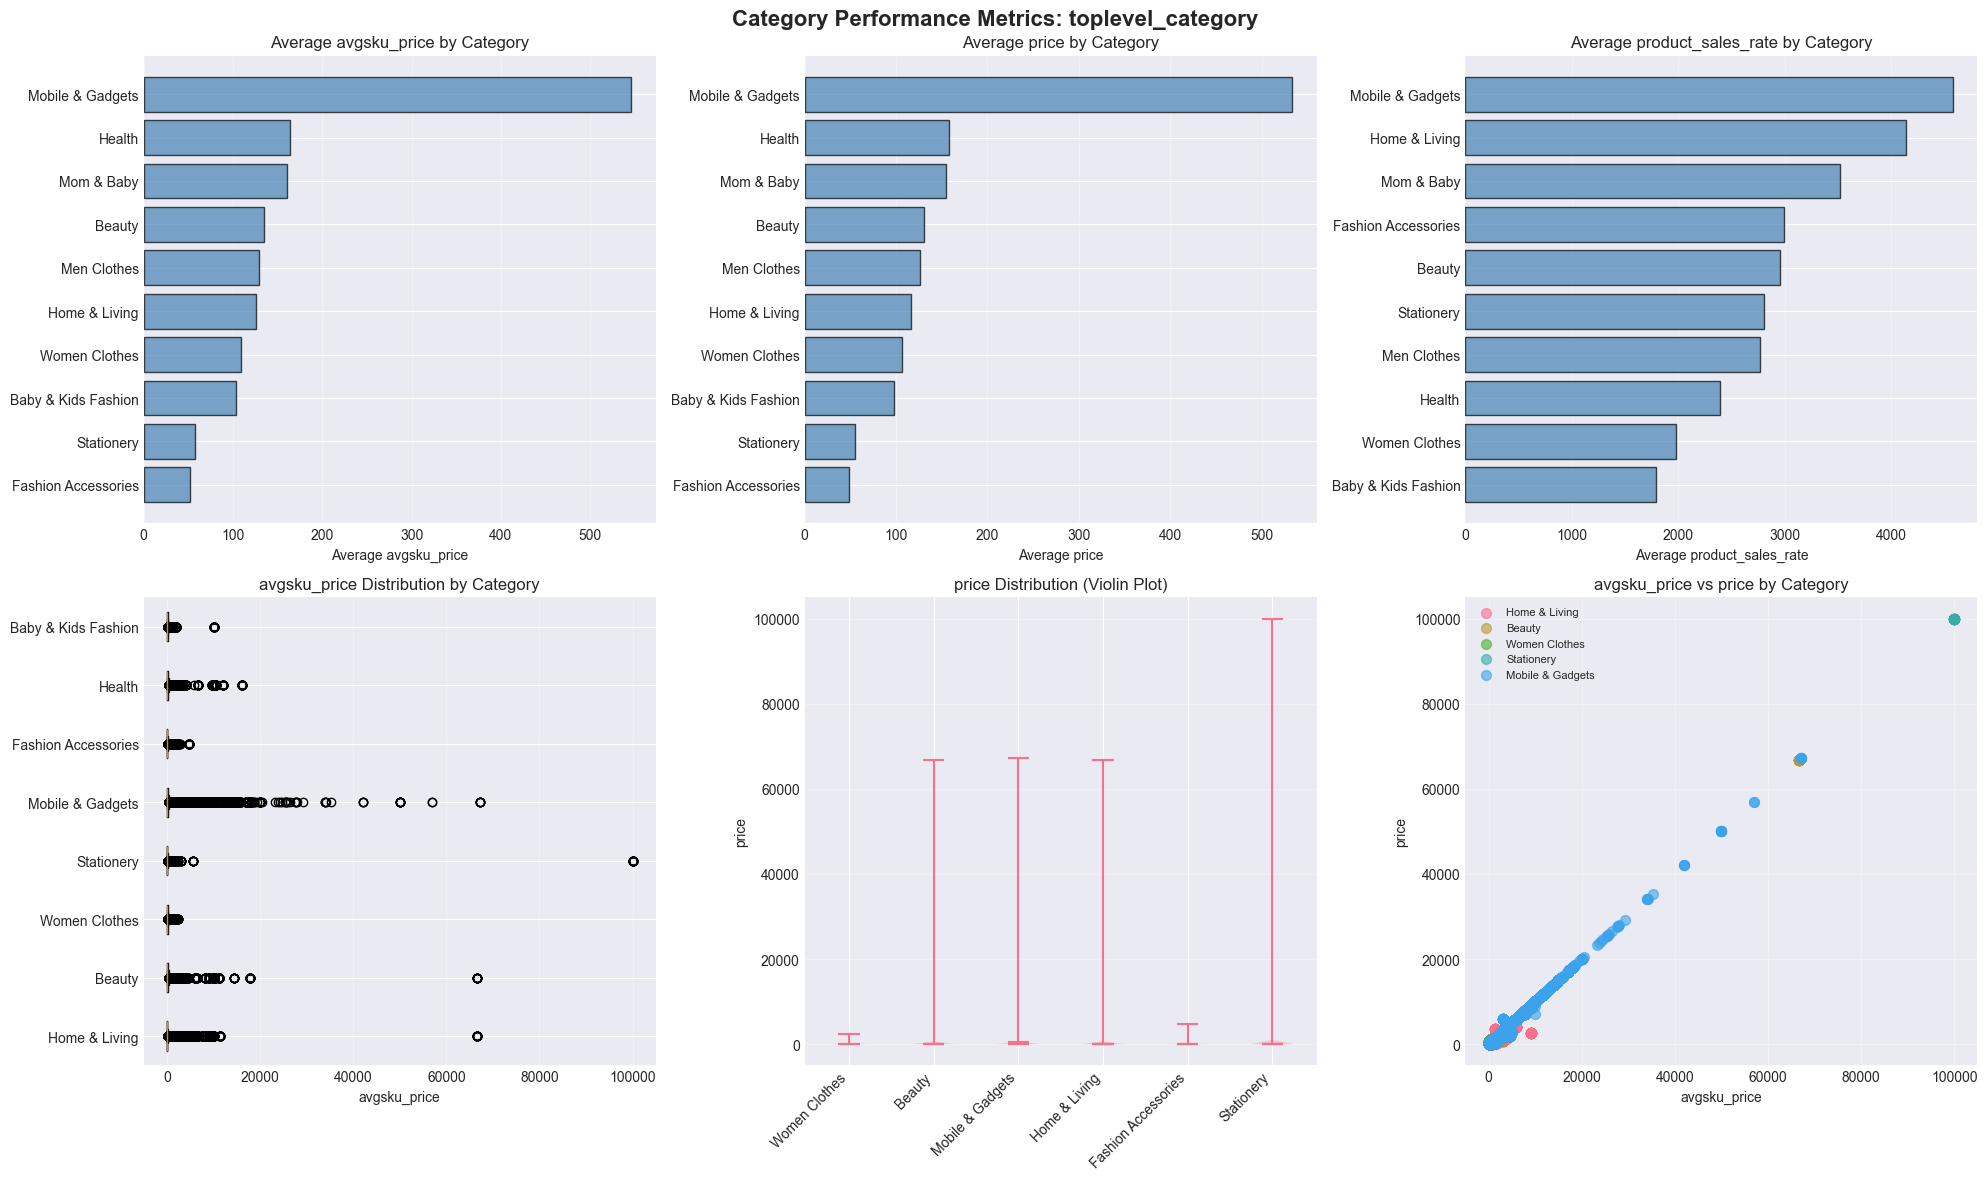


🏆 Top Performers by Metrics:

  Top 3 by average avgsku_price:
    1. Cameras & Drones: 560.00
    2. Home Appliances: 551.33
    3. Mobile & Gadgets: 546.16

  Top 3 by average price:
    1. Mobile & Gadgets: 533.43
    2. Cameras & Drones: 513.60
    3. Home Appliances: 509.68

  Top 3 by average product_sales_rate:
    1. Gaming & Consoles: 7735.93
    2. Sports & Outdoors: 6061.78
    3. Cameras & Drones: 5782.22

  Top 3 by average price:
    1. Mobile & Gadgets: 533.43
    2. Cameras & Drones: 513.60
    3. Home Appliances: 509.68

  Top 3 by average product_sales_rate:
    1. Gaming & Consoles: 7735.93
    2. Sports & Outdoors: 6061.78
    3. Cameras & Drones: 5782.22


In [35]:
# Category Performance Metrics
print("="*80)
print("CATEGORY PERFORMANCE METRICS")
print("="*80)

if main_category_cols and key_vars:
    for cat_col in main_category_cols[:1]:  # Analyze first category column
        print(f"\n{'='*80}")
        print(f"Performance Metrics by: {cat_col.upper()}")
        print(f"{'='*80}")
        
        # Get top categories
        top_categories = df[cat_col].value_counts().head(10).index.tolist()
        
        # Calculate metrics by category
        category_metrics = df[df[cat_col].isin(top_categories)].groupby(cat_col).agg({
            **{var: ['mean', 'median', 'sum', 'std'] for var in key_vars[:3]}
        }).round(2)
        
        print(f"\nPerformance Summary (Top 10 Categories):")
        print(category_metrics)
        
        # Visualizations
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle(f'Category Performance Metrics: {cat_col}', fontsize=16, fontweight='bold')
        
        # For each key variable, create comparison charts
        for idx, var in enumerate(key_vars[:3]):
            row = idx // 3
            col = idx % 3
            
            # Bar chart of mean values
            category_means = df[df[cat_col].isin(top_categories)].groupby(cat_col)[var].mean().sort_values(ascending=False)
            
            axes[row, col].barh(range(len(category_means)), category_means.values, 
                               color='steelblue', edgecolor='black', alpha=0.7)
            axes[row, col].set_yticks(range(len(category_means)))
            axes[row, col].set_yticklabels(category_means.index)
            axes[row, col].set_xlabel(f'Average {var}')
            axes[row, col].set_title(f'Average {var} by Category')
            axes[row, col].invert_yaxis()
            axes[row, col].grid(True, alpha=0.3, axis='x')
        
        # Box plots for first key variable
        if len(key_vars) > 0:
            var = key_vars[0]
            row, col = 1, 0
            
            category_data = [df[df[cat_col] == cat][var].dropna().values 
                           for cat in top_categories[:8]]
            
            axes[row, col].boxplot(category_data, labels=top_categories[:8], vert=False)
            axes[row, col].set_xlabel(var)
            axes[row, col].set_title(f'{var} Distribution by Category')
            axes[row, col].grid(True, alpha=0.3, axis='x')
        
        # Violin plot for second key variable
        if len(key_vars) > 1:
            var = key_vars[1]
            row, col = 1, 1
            
            plot_data = df[df[cat_col].isin(top_categories[:6])][[cat_col, var]].dropna()
            
            categories_sorted = plot_data.groupby(cat_col)[var].median().sort_values(ascending=False).index.tolist()
            
            parts = axes[row, col].violinplot([plot_data[plot_data[cat_col] == cat][var].values 
                                              for cat in categories_sorted],
                                             positions=range(len(categories_sorted)),
                                             showmeans=True, showmedians=True)
            axes[row, col].set_xticks(range(len(categories_sorted)))
            axes[row, col].set_xticklabels(categories_sorted, rotation=45, ha='right')
            axes[row, col].set_ylabel(var)
            axes[row, col].set_title(f'{var} Distribution (Violin Plot)')
            axes[row, col].grid(True, alpha=0.3, axis='y')
        
        # Scatter plot comparing two key variables
        if len(key_vars) >= 2:
            var1, var2 = key_vars[0], key_vars[1]
            row, col = 1, 2
            
            for cat in top_categories[:5]:
                cat_data = df[df[cat_col] == cat][[var1, var2]].dropna()
                if len(cat_data) > 0:
                    axes[row, col].scatter(cat_data[var1], cat_data[var2], 
                                          label=cat, alpha=0.6, s=50)
            
            axes[row, col].set_xlabel(var1)
            axes[row, col].set_ylabel(var2)
            axes[row, col].set_title(f'{var1} vs {var2} by Category')
            axes[row, col].legend(loc='best', fontsize=8)
            axes[row, col].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Top performers analysis
        print(f"\n🏆 Top Performers by Metrics:")
        for var in key_vars[:3]:
            top_cat = df.groupby(cat_col)[var].mean().sort_values(ascending=False).head(3)
            print(f"\n  Top 3 by average {var}:")
            for idx, (cat, value) in enumerate(top_cat.items(), 1):
                print(f"    {idx}. {cat}: {value:.2f}")

else:
    print("⚠️ Category columns or key variables not available")